# Projet 4 : Segmentez des clients d'un site e-commerce
# Analyse Exploratoire

## 1. Importation des données

### 1.1. Chargement des librairies

In [1]:
# Manipulation des données
import numpy as np
import pandas as pd

# Visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")  # style choisi pour les graphes
from mpl_toolkits.mplot3d import Axes3D

# Afficher sur 45 colonnes
pd.set_option("display.max_column", 45)

# Utilisation du module nb_black pour formater le code
%load_ext nb_black

<IPython.core.display.Javascript object>

### 1.2. Chargement des données

In [2]:
# Plusieurs datasets à charger

# Customer dataframe
df_cust = pd.read_csv("olist_customers_dataset.csv")

# Geolocalisation dataframe
df_geoloc = pd.read_csv("olist_geolocation_dataset.csv")

# order_items dataframe
df_order_items = pd.read_csv("olist_order_items_dataset.csv")

# order_payments dataframe
df_order_paym = pd.read_csv("olist_order_payments_dataset.csv")

# order_reviews dataframe
df_order_rev = pd.read_csv("olist_order_reviews_dataset.csv")

# orders dataframe
df_orders = pd.read_csv("olist_orders_dataset.csv")

# products dataframe
df_products = pd.read_csv("olist_products_dataset.csv")

# sellers dataframe
df_sellers = pd.read_csv("olist_sellers_dataset.csv")

# product category name translation
df_prod_cat_names = pd.read_csv("product_category_name_translation.csv")

<IPython.core.display.Javascript object>

Lien entre les datasets :
https://i.imgur.com/HRhd2Y0.png![image.png](attachment:image.png)

### 1.3. Aperçu des datasets

In [3]:
df_cust.head(5)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

<IPython.core.display.Javascript object>

In [4]:
df_geoloc.head(5)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

<IPython.core.display.Javascript object>

In [5]:
df_geoloc.describe()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02

<IPython.core.display.Javascript object>

In [6]:
df_order_items.head(5)

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

<IPython.core.display.Javascript object>

In [7]:
df_order_items.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

<IPython.core.display.Javascript object>

In [8]:
df_order_paym.head(5)

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

<IPython.core.display.Javascript object>

In [9]:
df_order_paym.describe()

payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

<IPython.core.display.Javascript object>

In [10]:
df_order_rev.head(5)

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

<IPython.core.display.Javascript object>

In [11]:
df_order_rev.describe()

review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

<IPython.core.display.Javascript object>

In [12]:
df_orders.head(5)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

<IPython.core.display.Javascript object>

In [13]:
df_products.head(5)

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

<IPython.core.display.Javascript object>

In [14]:
df_products.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

<IPython.core.display.Javascript object>

In [15]:
df_sellers.head(5)

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

<IPython.core.display.Javascript object>

In [16]:
df_prod_cat_names.head(5)

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

<IPython.core.display.Javascript object>

## 2. Description des données

### 2.1. Structure des données

In [17]:
# Dictionnaire des dataframes
dico_df = {
    "customer": df_cust,
    "geoloc": df_geoloc,
    "order_items": df_order_items,
    "order_paym": df_order_paym,
    "order_reviews": df_order_rev,
    "orders": df_orders,
    "products": df_products,
    "sellers": df_sellers,
    "product_cat_names_translat": df_prod_cat_names,
}

<IPython.core.display.Javascript object>

In [18]:
# Information sur les colonnes
for name, df in dico_df.items():
    print(name)
    df.info()
    print("\n")

customer
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


geoloc
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             

<IPython.core.display.Javascript object>

Il faudra mettre les colonnes relatives aux dates au format date (actuellement au format object, sous réserve de leur utilité). Il s'agit des colonnes : 
- shipping_limit_date
- review_creation_date
- review_answer_timestamp
- order_purchase_timestamp
- order_approved_at
- order_delivered_carrier_date
- order_delivered_customer_date
- order_estimated_delivery_date

In [19]:
# Taille des datasets
for name, df in dico_df.items():
    print("Taille de {} : {}".format(name, df.shape))

Taille de customer : (99441, 5)
Taille de geoloc : (1000163, 5)
Taille de order_items : (112650, 7)
Taille de order_paym : (103886, 5)
Taille de order_reviews : (99224, 7)
Taille de orders : (99441, 8)
Taille de products : (32951, 9)
Taille de sellers : (3095, 4)
Taille de product_cat_names_translat : (71, 2)


<IPython.core.display.Javascript object>

#### Valeurs manquantes

In [20]:
def perc_missing(df):

    """ Fonction retourner le pourcentage de valeurs manquantes 
    des colonnes d'un dataframe
        
    - Arguments :
        - df : dataframe 
    
    - Retourne :
        - les pourcentages,  classés par ordre décroissant,
        de valeurs manquantes des colonnes du dataframe
       
    """

    return (df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

<IPython.core.display.Javascript object>

In [21]:
# Valeurs manquantes dans les datasets
for name, df in dico_df.items():
    print("% de valeurs manquantes chez", name)
    print(perc_missing(df))
    print("\n")

% de valeurs manquantes chez customer
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64


% de valeurs manquantes chez geoloc
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64


% de valeurs manquantes chez order_items
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64


% de valeurs manquantes chez order_paym
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64


% de valeurs manquantes chez order_reviews
review_comment_title       88.341530
review_comment_message     58.702

<IPython.core.display.Javascript object>

Les 2/3 des datasets n'ont pas de valeurs manquantes.

On a beaucoup de valeurs manquantes dans le dataset des reviews, notamment sur le titre de message (peu important) et sur la présence d'un commentaire.

Dans les datasets des orders et products, on a moins de 3% de valeurs manquantes. A voir si on les supprime ou les impute par une valeur.

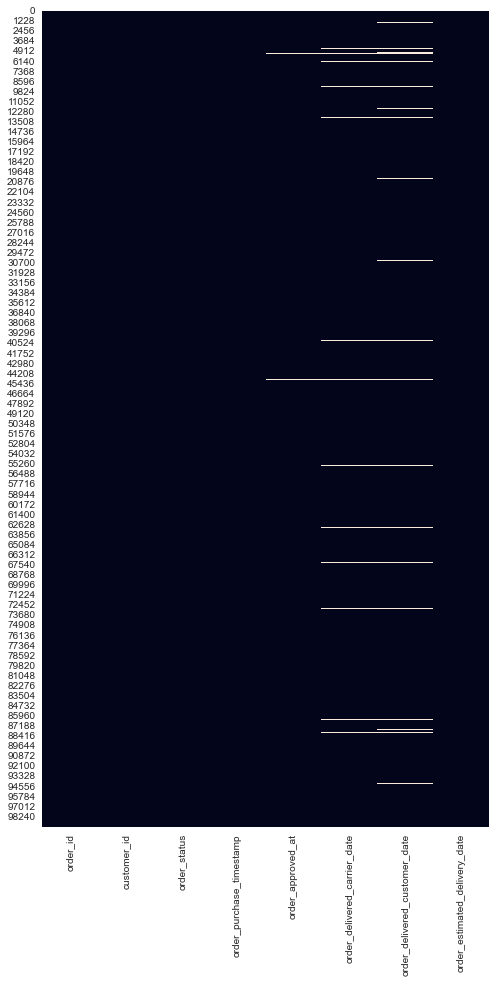

<IPython.core.display.Javascript object>

In [22]:
# Affichage des valeurs manquantes pour df_orders dans une heatmap
plt.figure(figsize=(8, 15))
sns.heatmap(df_orders.isna(), cbar=False)
plt.show()

Gobalement les valeurs manquantes des différentes colonnes sont sur les mêmes lignes.

A voir si les lignes correspondantes à des valeurs manquantes de order_delivered_customer_date sont liées à des commentaires clients.

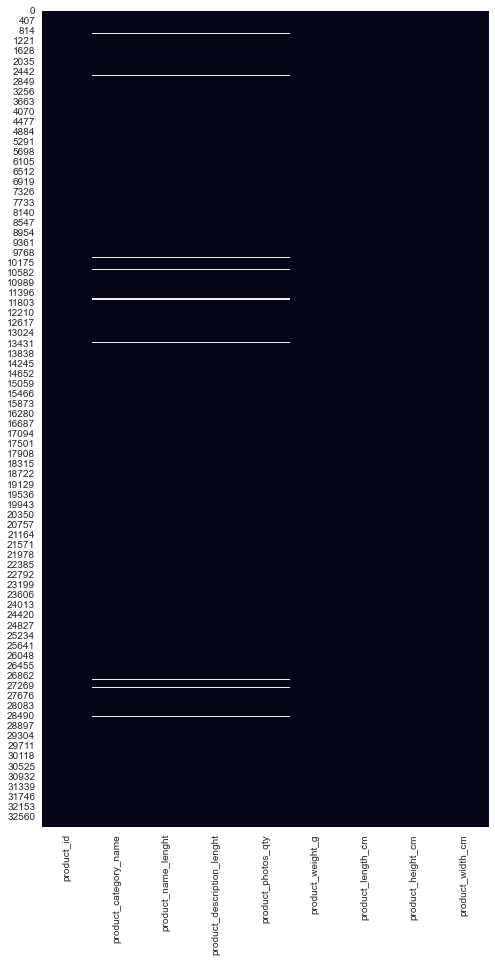

<IPython.core.display.Javascript object>

In [23]:
# Affichage des valeurs manquantes pour df_products dans une heatmap
plt.figure(figsize=(8, 15))
sns.heatmap(df_products.isna(), cbar=False)
plt.show()

Idem ici, les valeurs manquantes des colonnes concernent les mêmes produits.

#### Doublons

In [24]:
# Doublons dans les datasets
for name, df in dico_df.items():
    print("Nb de doublons chez {} : {}".format(name, df.duplicated().sum()))

Nb de doublons chez customer : 0
Nb de doublons chez geoloc : 261831
Nb de doublons chez order_items : 0
Nb de doublons chez order_paym : 0
Nb de doublons chez order_reviews : 0
Nb de doublons chez orders : 0
Nb de doublons chez products : 0
Nb de doublons chez sellers : 0
Nb de doublons chez product_cat_names_translat : 0


<IPython.core.display.Javascript object>

26% de doublons dans le dataset df_geoloc.

#### Valeurs uniques

In [25]:
for name, df in dico_df.items():
    print(name)
    print("Nombre de valeurs uniques chez : ")
    for column in df.columns:
        print("- {} : {}".format(column, df[column].nunique()))
    print("\n")

customer
Nombre de valeurs uniques chez : 
- customer_id : 99441
- customer_unique_id : 96096
- customer_zip_code_prefix : 14994
- customer_city : 4119
- customer_state : 27


geoloc
Nombre de valeurs uniques chez : 
- geolocation_zip_code_prefix : 19015
- geolocation_lat : 717360
- geolocation_lng : 717613
- geolocation_city : 8011
- geolocation_state : 27


order_items
Nombre de valeurs uniques chez : 
- order_id : 98666
- order_item_id : 21
- product_id : 32951
- seller_id : 3095
- shipping_limit_date : 93318
- price : 5968
- freight_value : 6999


order_paym
Nombre de valeurs uniques chez : 
- order_id : 99440
- payment_sequential : 29
- payment_type : 5
- payment_installments : 24
- payment_value : 29077


order_reviews
Nombre de valeurs uniques chez : 
- review_id : 98410
- order_id : 98673
- review_score : 5
- review_comment_title : 4527
- review_comment_message : 36159
- review_creation_date : 636
- review_answer_timestamp : 98248


orders
Nombre de valeurs uniques chez : 
- or

<IPython.core.display.Javascript object>

On remarque que :

- chez customer : 
    - plus de valeurs dans la colonne customer_id que dans customer_unique_id
    - la colonne customer_state prend peu de valeurs (27) : elle pourrait donc être catégorisée
    
- chez geoloc :
    - la colonne geolocation_city prend plus de valeurs que customer_city (8011 vs 4119)
    - la colonne geolocation_state prend peu de valeurs (27) : elle pourrait donc être catégorisée
    
- chez order_paym :
    - la colonne order_id contient plus de valeurs que dans le dataset order_items (99440 vs 98666)
    - la colonne payment_type prend peu de valeurs (5) : elle pourrait donc être catégorisée

- chez order_reviews :
    - la colonne order_id prend un nombre de valeurs différents par rapport aux datasets order_paym et order_items (98410)

- chez orders :
    - la colonne order_id prend un nombre de valeurs quasi identique à celui du dataset order_paym (99441 vs 99440)
    - les colonnes order_id et customer_id prennent le même nombre de valeurs (99441)

- chez sellers :
    - la colonne seller_city prend nettement moins de valeurs que pour customer_city (611 vs 4119)
    - la colonne seller_state prend peu de valeurs (23) : elle pourrait donc être catégorisée

- chez product_cat_names_translat :
    - la colonne product_category_name prend 2 valeurs de moins dans ce dataset que dans le dataset products (71 vs 73)

#### Tableau récapitulatif des informations sur les datasets

In [26]:
# Dataframe récapitulatif des informations

# Création de listes vides pour stocker les informations
# nom du dataset
liste_datasets = []
# nom des colonnes
liste_colonnes = []
# types des colonnes
liste_types = []
# longueurs des colonnes
liste_tailles = []
# nombre de valeurs uniques
liste_uniques = []
# % de valeurs manquantes pour les colonnes
liste_missing = []

# On parcourt le dictionnaire des datasets
for name, df in dico_df.items():

    # pour chaque colonne des datasets
    for column in df.columns:
        # on ajoute les informations dans les listes correspondantes
        liste_datasets.append(name)
        liste_colonnes.append(column)
        liste_types.append(df[column].dtype)
        liste_tailles.append(len(df[column]))
        liste_uniques.append(df[column].nunique())
        liste_missing.append(round((df[column].isna().sum() / df.shape[0] * 100), 2))

# Création du dataframe récapitulatif
recap_data = pd.DataFrame(
    [
        liste_datasets,
        liste_colonnes,
        liste_types,
        liste_tailles,
        liste_uniques,
        liste_missing,
    ]
).T

# Attribution de noms aux colonnes
recap_data.columns = [
    "Dataset",
    "Nom colonne",
    "Type",
    "Taille",
    "Valeurs uniques",
    "% valeurs manquantes",
]

# Affichage du dataset
recap_data

Dataset                    Nom colonne     Type  \
0                     customer                    customer_id   object   
1                     customer             customer_unique_id   object   
2                     customer       customer_zip_code_prefix    int64   
3                     customer                  customer_city   object   
4                     customer                 customer_state   object   
5                       geoloc    geolocation_zip_code_prefix    int64   
6                       geoloc                geolocation_lat  float64   
7                       geoloc                geolocation_lng  float64   
8                       geoloc               geolocation_city   object   
9                       geoloc              geolocation_state   object   
10                 order_items                       order_id   object   
11                 order_items                  order_item_id    int64   
12                 order_items                     product_id   object   
13                 order_items                      seller_id   object   
14                 order_items            shipping_limit_date   object   
15                 order_items                          price  float64   
16                 order_items                  freight_value  float64   
17                  order_paym                       order_id   object   
18                  order_paym             payment_sequential    int64   
19                  order_paym                   payment_type   object   
20                  order_paym           payment_installments    int64   
21                  order_paym                  payment_value  float64   
22               order_reviews                      review_id   object   
23               order_reviews                       order_id   object   
24               order_reviews                   review_score    int64   
25               order_reviews           review_comment_title   object   
26               order_reviews         review_comment_message   object   
27               order_reviews           review_creation_date   object   
28               order_reviews        review_answer_timestamp   object   
29                      orders                       order_id   object   
30                      orders                    customer_id   object   
31                      orders                   order_status   object   
32                      orders       order_purchase_timestamp   object   
33                      orders              order_approved_at   object   
34                      orders   order_delivered_carrier_date   object   
35                      orders  order_delivered_customer_date   object   
36                      orders  order_estimated_delivery_date   object   
37                    products                     product_id   object   
38                    products          product_category_name   object   
39                    products            product_name_lenght  float64   
40                    products     product_description_lenght  float64   
41                    products             product_photos_qty  float64   
42                    products               product_weight_g  float64   
43                    products              product_length_cm  float64   
44                    products              product_height_cm  float64   
45                    products               product_width_cm  float64   
46                     sellers                      seller_id   object   
47                     sellers         seller_zip_code_prefix    int64   
48                     sellers                    seller_city   object   
49                     sellers                   seller_state   object   
50  product_cat_names_translat          product_category_name   object   
51  product_cat_names_translat  product_category_name_english   object   

     Taille Valeurs uniques % valeurs manquantes  
0     99441           99441                  0.0 

<IPython.core.display.Javascript object>

### 2.2. Nettoyage des datasets

In [27]:
# Copies des datasets d'origine
df_cust1 = df_cust.copy()
df_geoloc1 = df_geoloc.copy()
df_order_items1 = df_order_items.copy()
df_order_paym1 = df_order_paym.copy()
df_order_rev1 = df_order_rev.copy()
df_orders1 = df_orders.copy()
df_products1 = df_products.copy()
df_sellers1 = df_sellers.copy()
df_prod_cat_names1 = df_prod_cat_names.copy()

<IPython.core.display.Javascript object>

In [28]:
# Suppression des doublons dans le dataset geoloc
df_geoloc1.drop_duplicates(inplace=True)
print(df_geoloc1.shape)

(738332, 5)


<IPython.core.display.Javascript object>

#### Gestion des Nan

In [29]:
# On met un 'blanc' pour les valeurs manquantes
# dans le dataset order_reviews
df_order_rev1["review_comment_title"].fillna(" ", inplace=True)
df_order_rev1["review_comment_message"].fillna(" ", inplace=True)

# On met la valeur 0 pour les valeurs manquantes
# dans le dataset orders
df_orders1["order_approved_at"].fillna(0, inplace=True)
df_orders1["order_delivered_carrier_date"].fillna(0, inplace=True)
df_orders1["order_delivered_customer_date"].fillna(0, inplace=True)

# On met la valeur 'Unknown' pour les valeurs manquantes
# de la colonne product_category_name du dataset products
df_products1["product_category_name"].fillna("unknown", inplace=True)

# On met la valeur 0 pour les valeurs manquantes
# des colonnes numérique du dataset products
df_products1["product_name_lenght"].fillna(0, inplace=True)
df_products1["product_description_lenght"].fillna(0, inplace=True)
df_products1["product_photos_qty"].fillna(0, inplace=True)
df_products1["product_weight_g"].fillna(0, inplace=True)
df_products1["product_length_cm"].fillna(0, inplace=True)
df_products1["product_height_cm"].fillna(0, inplace=True)
df_products1["product_width_cm"].fillna(0, inplace=True)

<IPython.core.display.Javascript object>

#### Colonnes liées aux dates mises au format datetime 

In [30]:
df_order_items1["shipping_limit_date"] = pd.to_datetime(
    df_order_items1["shipping_limit_date"]
)
df_orders1["order_purchase_timestamp"] = pd.to_datetime(
    df_orders1["order_purchase_timestamp"]
)
df_orders1["order_approved_at"] = pd.to_datetime(
    df_orders1["order_approved_at"], errors="coerce"
)
# ‘coerce’ : invalid parsing will be set as NaT
df_orders1["order_delivered_carrier_date"] = pd.to_datetime(
    df_orders1["order_delivered_carrier_date"], errors="coerce"
)
df_orders1["order_delivered_customer_date"] = pd.to_datetime(
    df_orders1["order_delivered_customer_date"], errors="coerce"
)
df_orders1["order_estimated_delivery_date"] = pd.to_datetime(
    df_orders1["order_estimated_delivery_date"]
)

<IPython.core.display.Javascript object>

## 3. Analyse exploratoire 
### 3.1. Sur datasets avant fusion

#### Nombre de clients

In [31]:
df_cust1["customer_unique_id"].nunique()

96096

<IPython.core.display.Javascript object>

#### Nombre de commandes

In [32]:
df_orders1["order_id"].nunique()

99441

<IPython.core.display.Javascript object>

Certains clients ont effectué plus de 1 commande.

In [33]:
df_nb_cmd = df_cust1.groupby("customer_unique_id")["customer_id"].nunique()
df_nb_cmd.rename("nb_cmd", inplace=True)

# Récupération de la liste customer_unique_id des clients ayant fait plus d'une commande
liste_cust2 = list(df_nb_cmd[df_nb_cmd.values >= 2].index)
len(liste_cust2)

2997

<IPython.core.display.Javascript object>

3.1% des clients ont effectué au moins 2 commandes
#### Dates d'achat

In [34]:
# Date la plus récente
df_orders1["order_purchase_timestamp"].max()

Timestamp('2018-10-17 17:30:18')

<IPython.core.display.Javascript object>

In [35]:
# Date la plus ancienne
df_orders1["order_purchase_timestamp"].min()

Timestamp('2016-09-04 21:15:19')

<IPython.core.display.Javascript object>

In [36]:
# Etendue temporelle pour les dates d'achats
delta = (
    df_orders1["order_purchase_timestamp"].max()
    - df_orders1["order_purchase_timestamp"].min()
) / np.timedelta64(1, "D")
delta

772.843738425926

<IPython.core.display.Javascript object>

Les datasets s'étendent sur 773 jours soit environ 2 années.

#### Nombre de vendeurs

In [37]:
df_sellers1["seller_id"].nunique()

3095

<IPython.core.display.Javascript object>

#### Distribution des colonnes en relation avec les prix

In [38]:
def dis_plot(df, col):

    """ Fonction pour visualiser sous forme de displot 
    la distribution d'une colonne d'un dataframe 
        
    - Arguments :
        - df : dataframe 
        - col : colonne du dataframe dont on veut visualiser 
        la distribution
    
    - Affiche :
        - 1 graphe de type displot 
       
    """

    sns.displot(data=df, x=col)
    plt.xlabel(col, size=14)
    plt.ylabel("Count", size=14)
    plt.show()

<IPython.core.display.Javascript object>

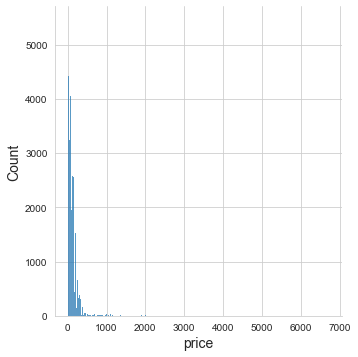

<IPython.core.display.Javascript object>

In [39]:
# Visualisation de la distribution de price
# du dataset order_items sous forme de displot
dis_plot(df_order_items1, "price")

Il semble y avoir des outliers vu la forme de la distribution.

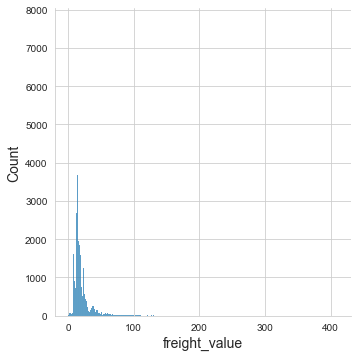

<IPython.core.display.Javascript object>

In [40]:
# Visualisation de la distribution de freight_value
# du dataset order_items sous forme de displot
dis_plot(df_order_items1, "freight_value")

Il semble y avoir des outliers vu la forme de la distribution.

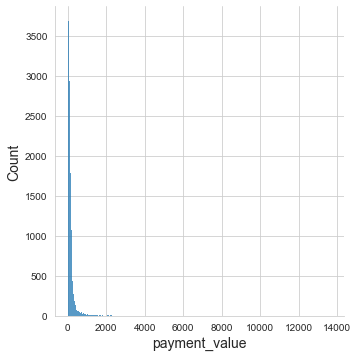

<IPython.core.display.Javascript object>

In [41]:
# Visualisation de la distribution de payment_value
# du dataset order_paym sous forme de displot
dis_plot(df_order_paym1, "payment_value")

Il semble y avoir des outliers vu la forme de la distribution.

D'autre part la plage de valeurs semble plus étalée que celle de 'price'.

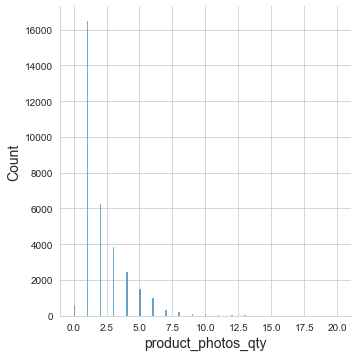

<IPython.core.display.Javascript object>

In [42]:
# Visualisation de la distribution de product_photos_qty
# du dataset df_products1 sous forme de displot
dis_plot(df_products1, "product_photos_qty")

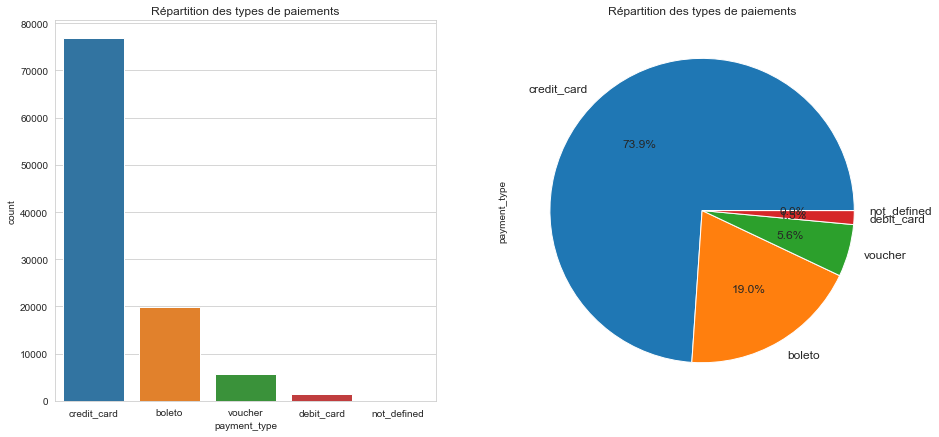

<IPython.core.display.Javascript object>

In [43]:
# Répartition des types de payment
f, ax = plt.subplots(figsize=(15, 7))

# Countplot
plt.subplot(121)
sns.countplot(x="payment_type", data=df_order_paym1)
plt.title("Répartition des types de paiements")

# Piechart
plt.subplot(122)
df_order_paym1.payment_type.value_counts().plot(
    kind="pie", autopct="%.1f%%", fontsize=12
)
plt.title("Répartition des types de paiements")
plt.show()

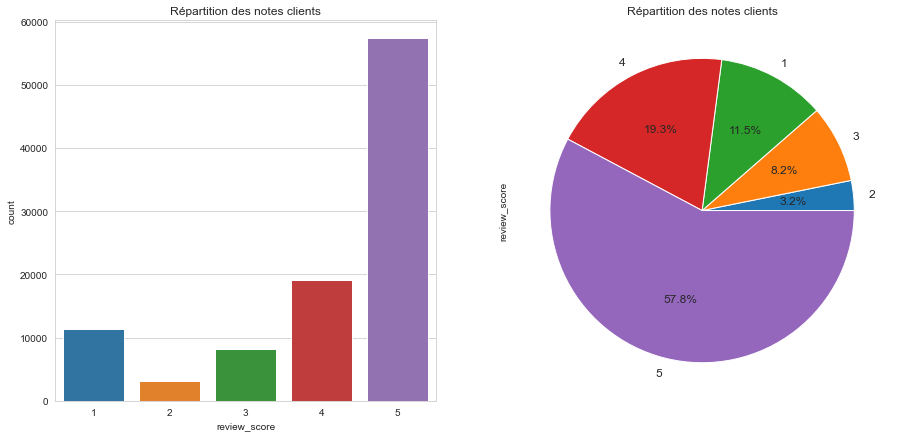

<IPython.core.display.Javascript object>

In [44]:
# Répartition des notes clients
f, ax = plt.subplots(figsize=(15, 7))

# Countplot
plt.subplot(121)
sns.countplot(x="review_score", data=df_order_rev1)
plt.title("Répartition des notes clients")

# Piechart
plt.subplot(122)
df_order_rev1.review_score.value_counts().sort_values().plot(
    kind="pie", autopct="%.1f%%", fontsize=12
)
plt.title("Répartition des notes clients")
plt.show()

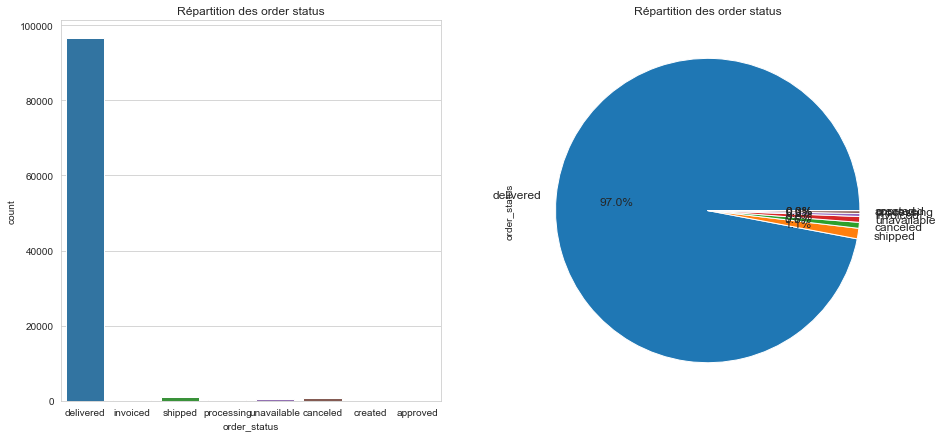

<IPython.core.display.Javascript object>

In [45]:
# Répartition des order_status
f, ax = plt.subplots(figsize=(15, 7))

# Countplot
plt.subplot(121)
sns.countplot(x="order_status", data=df_orders1)
plt.title("Répartition des order status")

# Piechart
plt.subplot(122)
df_orders1.order_status.value_counts().plot(kind="pie", autopct="%.1f%%", fontsize=12)
plt.title("Répartition des order status")
plt.show()

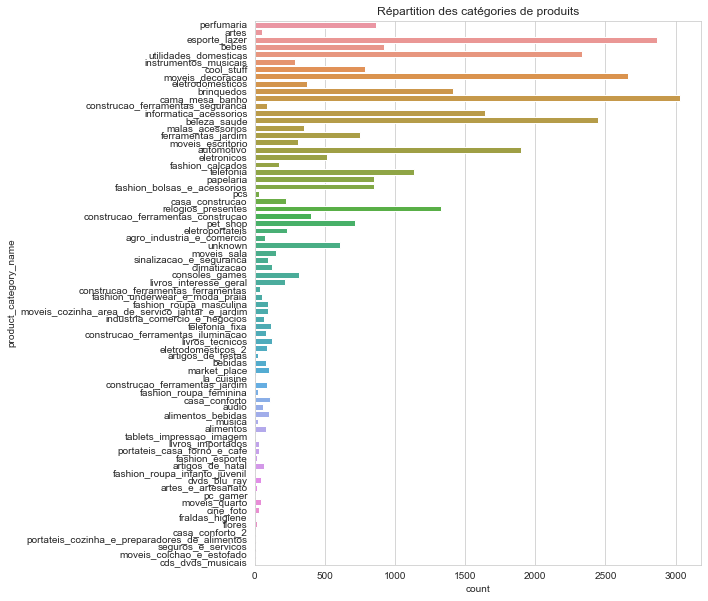

<IPython.core.display.Javascript object>

In [46]:
# Répartition des catégories de produits
plt.figure(figsize=(8, 10))
sns.countplot(y="product_category_name", data=df_products1)
plt.title("Répartition des catégories de produits")
plt.show()

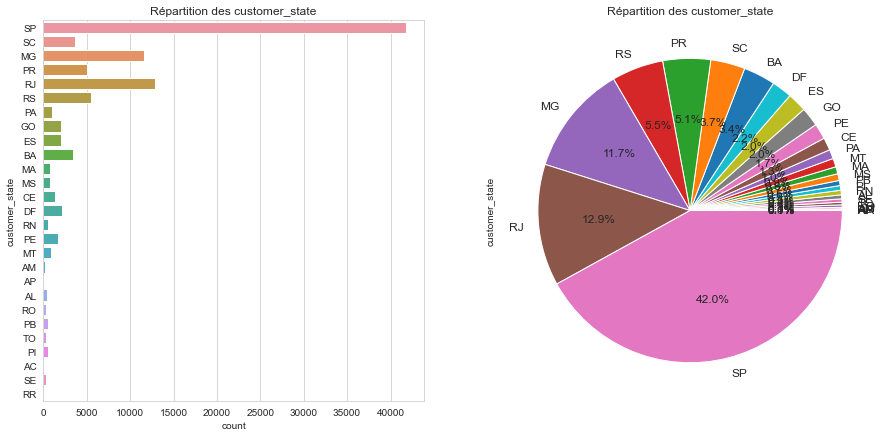

<IPython.core.display.Javascript object>

In [47]:
# Répartition des customer_state
f, ax = plt.subplots(figsize=(15, 7))

# Countplot
plt.subplot(121)
sns.countplot(y="customer_state", data=df_cust1)
plt.title("Répartition des customer_state")

# Piechart
plt.subplot(122)
df_cust1.customer_state.value_counts().sort_values().plot(
    kind="pie", autopct="%.1f%%", fontsize=12
)
plt.title("Répartition des customer_state")
plt.show()

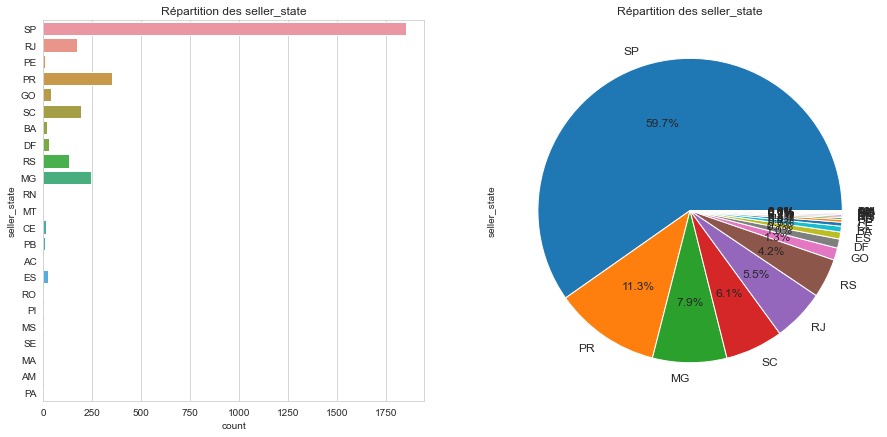

<IPython.core.display.Javascript object>

In [48]:
# Répartition des seller_state
f, ax = plt.subplots(figsize=(15, 7))

# Countplot
plt.subplot(121)
sns.countplot(y="seller_state", data=df_sellers1)
plt.title("Répartition des seller_state")

# Piechart
plt.subplot(122)
df_sellers1.seller_state.value_counts().plot(kind="pie", autopct="%.1f%%", fontsize=12)
plt.title("Répartition des seller_state")
plt.show()

### 3.2. Fusion des datasets
#### Fusion des datasets products et product_cat_names_translat

In [49]:
# On regarde les product_category_name absents
# dans le dataframe df_prod_cat_names1
liste_product_category_name = [
    x
    for x in df_products1["product_category_name"].unique()
    if x not in df_prod_cat_names1["product_category_name"].unique()
]
liste_product_category_name

['unknown', 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos']

<IPython.core.display.Javascript object>

In [50]:
# Rajout des catégories manquantes dans le dataframe df_prod_cat_names1
# création d'un dataframe avec la ligne 'unknown'
new_cat_dico = {
    "product_category_name": [
        "unknown",
        "pc_gamer",
        "portateis_cozinha_e_preparadores_de_alimentos",
    ],
    "product_category_name_english": [
        "unknown",
        "pc_gamer",
        "kitchen_laptops_and_food_preparers",
    ],
}

new_cat_df = pd.DataFrame(
    new_cat_dico, columns=["product_category_name", "product_category_name_english"]
)

# fusion des dataframes
df_prod_cat_names2 = pd.concat([df_prod_cat_names1, new_cat_df])

# vérification de la taille du dataset
print(df_prod_cat_names2.shape)

(74, 2)


<IPython.core.display.Javascript object>

In [51]:
# On fusionne les datasets products et product_cat_names_translat
# et on supprime la colonne 'product_category_name'
df_products2 = pd.merge(df_products1, df_prod_cat_names2).drop(
    ["product_category_name"], axis=1
)
df_products2

product_id  product_name_lenght  \
0      1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1      6a2fb4dd53d2cdb88e0432f1284a004c                 39.0   
2      0d009643171aee696f4733340bc2fdd0                 52.0   
3      b1eae565a61935e0011ee7682fef9dc9                 49.0   
4      8da90b37f0fb171b4877c124f965b1f6                 56.0   
...                                 ...                  ...   
32946  13b25797ad1e6d6c7cd3cbeb35f8ee7a                 44.0   
32947  dc36a7859b743d8610a2bbbaea26ece9                 29.0   
32948  107fde0930956120d1e13dd1062fbb46                 51.0   
32949  726b4e18f00255e2e63491bcba3f60b8                 41.0   
32950  1dceebcc5f23c02ea23e16d5bedca000                 47.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
0                           287.0                 1.0             225.0   
1                           346.0                 2.0             400.0   
2                           150.0                 1.0             422.0   
3                           460.0                 2.0             267.0   
4                           733.0                 3.0             377.0   
...                           ...                 ...               ...   
32946                       348.0                 1.0           18250.0   
32947                      2073.0                 2.0            2500.0   
32948                       418.0                 1.0           30000.0   
32949                       866.0                 1.0            1700.0   
32950                       117.0                 2.0             550.0   

       product_length_cm  product_height_cm  product_width_cm  \
0                   16.0               10.0              14.0   
1                   27.0                5.0              20.0   
2                   21.0               16.0              18.0   
3                   17.0               13.0              17.0   
4                   18.0               13.0              15.0   
...                  ...                ...               ...   
32946               25.0               25.0              25.0   
32947               41.0               21.0              21.0   
32948               60.0               73.0              60.0   
32949               70.0               10.0             100.0   
32950               35.0               15.0              25.0   

           product_category_name_english  
0                              perfumery  
1                              perfumery  
2                              perfumery  
3                              perfumery  
4                              perfumery  
...                                  ...  
32946  furniture_mattress_and_upholstery  
32947  furniture_mattress_and_upholstery  
32948  furniture_mattress_and_upholstery  
32949  furniture_mattress_and_upholstery  
32950                  cds_dvds_musicals  

[32951 rows x 9 columns]

<IPython.core.display.Javascript object>

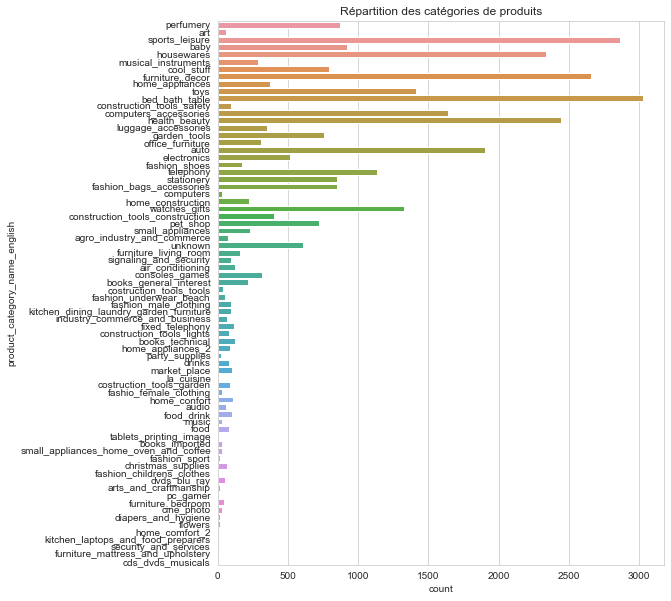

<IPython.core.display.Javascript object>

In [52]:
# Répartition des catégories de produits
plt.figure(figsize=(8, 10))
sns.countplot(y="product_category_name_english", data=df_products2)
plt.title("Répartition des catégories de produits")
plt.show()

#### Fusion des autres datasets

In [53]:
# Fusion des datasets customer et orders
df_cust_ord1 = pd.merge(df_cust1, df_orders1, how="left", on="customer_id")

# fusion du dataset avec order_items
df_cust_ord_items1 = pd.merge(df_cust_ord1, df_order_items1)

# Vérification des valeurs uniques
df_cust_ord_items1.nunique()

customer_id                      98666
customer_unique_id               95420
customer_zip_code_prefix         14976
customer_city                     4110
customer_state                      27
order_id                         98666
order_status                         7
order_purchase_timestamp         98112
order_approved_at                90175
order_delivered_carrier_date     81018
order_delivered_customer_date    95665
order_estimated_delivery_date      450
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
dtype: int64

<IPython.core.display.Javascript object>

Comme le dataset order_items a moins de order_id que dans les datasets orders et customers (98666 vs 99441), on a perdu en nombre de customer_unique_id (95420 vs 96096 soit 0.07%).

In [54]:
# Fusion avec le dataset des products
df_cust_ord_it_prod1 = pd.merge(df_cust_ord_items1, df_products2)

# Fusion avec le dataset des reviews
df_cust_ord_it_prod_rev1 = pd.merge(df_cust_ord_it_prod1, df_order_rev1)

# Vérification des valeurs uniques
df_cust_ord_it_prod_rev1.nunique()

customer_id                      97917
customer_unique_id               94721
customer_zip_code_prefix         14955
customer_city                     4108
customer_state                      27
order_id                         97917
order_status                         7
order_purchase_timestamp         97371
order_approved_at                89535
order_delivered_carrier_date     80451
order_delivered_customer_date    95023
order_estimated_delivery_date      450
order_item_id                       21
product_id                       32789
seller_id                         3090
shipping_limit_date              92643
price                             5948
freight_value                     6976
product_name_lenght                 67
product_description_lenght        2959
product_photos_qty                  20
product_weight_g                  2200
product_length_cm                  100
product_height_cm                  103
product_width_cm                    96
product_category_name_eng

<IPython.core.display.Javascript object>

On a perdu en nombre de customer_unique_id (94721 vs 95420 soit 0.07%).

In [55]:
# Fusion avec le dataset des payments
df_cust_ord_it_prod_rev_pay1 = pd.merge(df_cust_ord_it_prod_rev1, df_order_paym1)

# Fusion avec le dataset des sellers
df_cust_ord_it_prod_rev_pay_sel1 = pd.merge(df_cust_ord_it_prod_rev_pay1, df_sellers1)

# Vérification des valeurs uniques
df_cust_ord_it_prod_rev_pay_sel1.nunique()

customer_id                      97916
customer_unique_id               94720
customer_zip_code_prefix         14955
customer_city                     4108
customer_state                      27
order_id                         97916
order_status                         7
order_purchase_timestamp         97370
order_approved_at                89534
order_delivered_carrier_date     80450
order_delivered_customer_date    95022
order_estimated_delivery_date      449
order_item_id                       21
product_id                       32789
seller_id                         3090
shipping_limit_date              92642
price                             5948
freight_value                     6976
product_name_lenght                 67
product_description_lenght        2959
product_photos_qty                  20
product_weight_g                  2200
product_length_cm                  100
product_height_cm                  103
product_width_cm                    96
product_category_name_eng

<IPython.core.display.Javascript object>

On a perdu un seul customer_unique_id.

#### Insertion des données de géolocalisation
On va insérer les données de géolocalisaton dans le gros dataset fusionné.

Ces données de géolocalisation concernent le customer_unique_id d'une part et d'autre part celles du seller_id.

In [56]:
# Récupération des latitudes et longitudes selon le customer_unique_id
# On fusionne les datasets en assimilant customer_zip_code_prefix
# à geolocation_zip_code_prefix, en prenant la moyenne et en groupant
# selon le customer_unique_id
df_geol = (
    pd.merge(
        df_cust1,
        df_geoloc1,
        how="left",
        left_on="customer_zip_code_prefix",
        right_on="geolocation_zip_code_prefix",
    )
    .groupby("customer_unique_id")
    .mean()[["geolocation_lat", "geolocation_lng"]]
    .reset_index()
)
df_geol.rename(
    columns={"geolocation_lat": "cust_geo_lat", "geolocation_lng": "cust_geo_long"},
    inplace=True,
)

<IPython.core.display.Javascript object>

In [57]:
# Récupération des latitudes et longitudes selon le seller_id
# On fusionne les datasets en assimilant seller_zip_code_prefix
# à geolocation_zip_code_prefix, en prenant la moyenne et en groupant
# selon le customer_unique_id
df_geol_sel = (
    pd.merge(
        df_sellers1,
        df_geoloc1,
        how="left",
        left_on="seller_zip_code_prefix",
        right_on="geolocation_zip_code_prefix",
    )
    .groupby("seller_id")
    .mean()[["geolocation_lat", "geolocation_lng"]]
    .reset_index()
)
df_geol_sel.rename(
    columns={"geolocation_lat": "seller_geo_lat", "geolocation_lng": "seller_geo_long"},
    inplace=True,
)

<IPython.core.display.Javascript object>

In [58]:
# Fusion finale
df_all = pd.merge(df_cust_ord_it_prod_rev_pay_sel1, df_geol)
df_all = pd.merge(df_all, df_geol_sel)

# Affichage du dataset
df_all

customer_id                customer_unique_id  \
0       06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1       8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2       8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3       f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4       6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   
...                                  ...                               ...   
117324  eda10d7eb51a675d000956fa1aabc7dd  5c22dbb9d8b5385953f2f1e6d9d115a7   
117325  f0f671d4034e98cdf20f0c452d6db02b  6532316a8c1a7c7a569482db073530bb   
117326  b90b857a277b080d8078332b3636ab58  7f5f43a9394964ac51bc5d1e0204ead4   
117327  1ed0c832c2dd99570a59260e71768bdf  82d46759af0369aad49084bacf85a6c3   
117328  1ed0c832c2dd99570a59260e71768bdf  82d46759af0369aad49084bacf85a6c3   

        customer_zip_code_prefix    customer_city customer_state  \
0                          14409           franca             SP   
1                          68030         santarem             PA   
2                          68030         santarem             PA   
3                          92480  nova santa rita             RS   
4                          25931             mage             RJ   
...                          ...              ...            ...   
117324                     39920         jordania             MG   
117325                      7231        guarulhos             SP   
117326                     76400           uruacu             GO   
117327                     37610      bom repouso             MG   
117328                     37610      bom repouso             MG   

                                order_id order_status  \
0       00e7ee1b050b8499577073aeb2a297a1    delivered   
1       c1d2b34febe9cd269e378117d6681172    delivered   
2       c1d2b34febe9cd269e378117d6681172    delivered   
3       b1a5d5365d330d10485e0203d54ab9e8    delivered   
4       2e604b3614664aa66867856dba7e61b7    delivered   
...                                  ...          ...   
117324  b494f624c631105b24fe497277085909    delivered   
117325  f73b31435ce6dec43df056154c39a1ce      shipped   
117326  d76fe905f4588ad69ab3b36527bb267d    delivered   
117327  51c6d2f460589fa7b65f2da51e860206    delivered   
117328  51c6d2f460589fa7b65f2da51e860206    delivered   

       order_purchase_timestamp   order_approved_at  \
0           2017-05-16 15:05:35 2017-05-16 15:22:12   
1           2017-11-09 00:50:13 2017-11-10 00:47:48   
2           2017-11-09 00:50:13 2017-11-10 00:47:48   
3           2017-05-07 20:11:26 2017-05-08 22:22:56   
4           2018-02-03 19:45:40 2018-02-04 22:29:19   
...                         ...                 ...   
117324      2018-08-01 18:58:49 2018-08-02 18:50:15   
117325      2018-08-20 12:37:54 2018-08-20 15:35:42   
117326      2018-08-18 20:59:58 2018-08-18 21:10:13   
117327      2017-11-14 12:04:09 2017-11-14 12:15:25   
117328      2017-11-14 12:04:09 2017-11-14 12:15:25   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-05-23 10:47:57           2017-05-25 10:35:35   
1               2017-11-22 01:43:37           2017-11-28 00:09:50   
2               2017-11-22 01:43:37           2017-11-28 00:09:50   
3               2017-05-19 20:16:31           2017-05-26 09:54:04   
4               2018-02-19 18:21:47           2018-02-28 21:09:00   
...                             ...                           ...   
117324          2018-08-03 15:39:00           2018-08-13 23:16:46   
117325          2018-08-24 16:48:00           1970-01-01 00:00:00   
117326          2018-08-20 16:49:00           2018-08-28 18:16:44   
117327          2017-11-27 20:44:47           2017-12-19 19:37:33   
117328          2017-11-27 20:44:47           2017-12-19 19:37:33   

       order_estimated_delivery_date  order_item_id  \
0                         2017-06-05         

<IPython.core.display.Javascript object>

In [59]:
# Vérification des valeurs uniques
df_all.nunique()

customer_id                      97916
customer_unique_id               94720
customer_zip_code_prefix         14955
customer_city                     4108
customer_state                      27
order_id                         97916
order_status                         7
order_purchase_timestamp         97370
order_approved_at                89534
order_delivered_carrier_date     80450
order_delivered_customer_date    95022
order_estimated_delivery_date      449
order_item_id                       21
product_id                       32789
seller_id                         3090
shipping_limit_date              92642
price                             5948
freight_value                     6976
product_name_lenght                 67
product_description_lenght        2959
product_photos_qty                  20
product_weight_g                  2200
product_length_cm                  100
product_height_cm                  103
product_width_cm                    96
product_category_name_eng

<IPython.core.display.Javascript object>

In [60]:
# Valeurs manquantes
perc_missing(df_all)

cust_geo_long                    0.265919
cust_geo_lat                     0.265919
seller_geo_long                  0.225008
seller_geo_lat                   0.225008
review_answer_timestamp          0.000000
product_width_cm                 0.000000
product_category_name_english    0.000000
review_id                        0.000000
review_score                     0.000000
review_comment_title             0.000000
review_comment_message           0.000000
review_creation_date             0.000000
payment_type                     0.000000
payment_sequential               0.000000
product_length_cm                0.000000
payment_installments             0.000000
payment_value                    0.000000
seller_zip_code_prefix           0.000000
seller_city                      0.000000
seller_state                     0.000000
product_height_cm                0.000000
customer_id                      0.000000
customer_unique_id               0.000000
order_delivered_customer_date    0

<IPython.core.display.Javascript object>

In [61]:
# Export du dataset au format csv
df_all.to_csv("all_data2.csv")

<IPython.core.display.Javascript object>

#### Dates d'achat du nouveau dataframe

In [62]:
# Date la plus récente
max_time_all = df_all["order_purchase_timestamp"].max()
max_time_all

Timestamp('2018-09-03 09:06:57')

<IPython.core.display.Javascript object>

In [63]:
# Date la plus ancienne
df_all["order_purchase_timestamp"].min()

Timestamp('2016-09-04 21:15:19')

<IPython.core.display.Javascript object>

In [64]:
# Etendue temporelle pour les dates d'achats avec conversion en jours
delta2 = (
    df_all["order_purchase_timestamp"].max() - df_all["order_purchase_timestamp"].min()
) / np.timedelta64(1, "D")
delta2

728.4941898148148

<IPython.core.display.Javascript object>

On a une étendue un peu plus faible que précédemment (773 jours), mais on reste autour de 2 ans.

### 3.4. Feature Engineering

Comme ce dataset comporte plusieurs lignes pour un même customer_unique_id, on va faire du feature engineering pour récupérer des variables pertinentes dans le cadre du projet.

On va choisir les variables suivantes :
- nombre total de commandes effectuées pour chaque client 
- montant dépensé au total pour chaque client : somme des colonnes 'price' et'freight_value' pour chaque 'customer_unique_id'
- nombre total de produits commandés pour chaque client
- note moyenne attribuée par chaque client
- temps écoulé (en jours) entre la dernière commande du client et la commande la plus récente du dataframe.

Pour cela, on va effectuer le feature engineering en plusieurs étapes.

In [65]:
# Sélection des colonnes à garder toutes les données
col_select = [
    "customer_id",
    "customer_unique_id",
    "order_id",
    "order_purchase_timestamp",
    "order_item_id",
    "price",
    "freight_value",
    "review_score",
]

# Tri des données par review_creation_date la plus récente
# dans le but de garder la note la plus récente
dfA = df_all.sort_values(["review_creation_date"], ascending=False).reset_index(
    drop=True
)

# Dataframe avec les colonnes désirées
dfA = dfA[col_select]

# Suppression des doublons au niveau de chaque commande
# et de chaque produit
dfB = (
    dfA.drop_duplicates(["customer_id", "order_item_id"], keep="first")
    .sort_values(["customer_unique_id"], ascending=False)
    .reset_index(drop=True)
)
dfB

customer_id                customer_unique_id  \
0       70bc4d9cf2bbeea3f7b09798370f5884  ffffd2657e2aad2907e67c3e9daecbeb   
1       832a3b0254347d409512ae92eaf154a6  ffff5962728ec6157033ef9805bacc48   
2       27f584b0f1dc4e610065c240f68b6be0  ffff371b4d645b6ecea244b27531430a   
3       0ecf8e0a08148af0bf313184f167670a  fffea47cd6d3cc0a88bd621562a9d061   
4       74be082247cd677a147d83ee670e9d53  fffcf5a5ff07b0908bd4e2dbc735a684   
...                                  ...                               ...   
111700  47227568b10f5f58a524a75507e6992c  0004aac84e0df4da2b147fca70cf8255   
111701  914991f0c02ef0843c0e7010c819d642  0000f6ccb0745a6a4b88665a16c9f078   
111702  9b3932a6253894a02c1df9d19004239f  0000f46a3911fa3c0805444483337064   
111703  4cb282e167ae9234755102258dd52ee8  0000b849f77a49e4a4ce2b2a4ca5be3f   
111704  fadbb3709178fc513abc1b2670aa1ad2  0000366f3b9a7992bf8c76cfdf3221e2   

                                order_id order_purchase_timestamp  \
0       f79a35da168301ae56922475da21117b      2017-05-02 20:18:45   
1       94d3ee0bc2a0af9d4fa47a4d63616e8d      2018-05-02 15:17:41   
2       fdc45e6c7555e6cb3cc0daca2557dbe1      2017-02-07 15:49:16   
3       c71b9252fd7b3b263aaa4cb09319a323      2017-12-10 20:07:56   
4       725cf8e9c24e679a8a5a32cb92c9ce1e      2017-06-08 21:00:36   
...                                  ...                      ...   
111700  d957021f1127559cd947b62533f484f7      2017-11-14 19:45:42   
111701  41272756ecddd9a9ed0180413cc22fb6      2017-10-12 20:29:41   
111702  b33ec3b699337181488304f362a6b734      2017-03-10 21:05:03   
111703  3594e05a005ac4d06a72673270ef9ec9      2018-05-07 11:11:27   
111704  e22acc9c116caa3f2b7121bbb380d08e      2018-05-10 10:56:27   

        order_item_id   price  freight_value  review_score  
0                   1   56.99          14.57             5  
1                   1  115.00          18.69             5  
2                   1   89.90          22.56             5  
3                   1   64.89          19.69             4  
4                   1  890.00         258.28             5  
...               ...     ...            ...           ...  
111700              1  180.00          16.89             5  
111701              1   25.99          17.63             4  
111702              1   69.00          17.22             3  
111703              1   18.90           8.29             4  
111704              1  129.90          12.00             5  

[111705 rows x 8 columns]

<IPython.core.display.Javascript object>

#### Nombre total de commandes effectuées

In [66]:
# Nombre total de commandes faites par customer_unique_id
df_nb_cmd_all = dfB.groupby("customer_unique_id")["customer_id"].nunique()
df_nb_cmd_all.rename("nb_cmd", inplace=True)

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    1
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: nb_cmd, Length: 94720, dtype: int64

<IPython.core.display.Javascript object>

#### Montant total dépensé

In [67]:
# Création de la colonne total_price toutes les données
dfB["total_price"] = dfB["price"] + dfB["freight_value"]

# Montant dépensé par customer_unique_id
df_montant_all = dfB.groupby("customer_unique_id")["total_price"].sum()
df_montant_all.rename("montant_dep", inplace=True)

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      27.19
0000f46a3911fa3c0805444483337064      86.22
0000f6ccb0745a6a4b88665a16c9f078      43.62
0004aac84e0df4da2b147fca70cf8255     196.89
                                     ...   
fffcf5a5ff07b0908bd4e2dbc735a684    2067.42
fffea47cd6d3cc0a88bd621562a9d061      84.58
ffff371b4d645b6ecea244b27531430a     112.46
ffff5962728ec6157033ef9805bacc48     133.69
ffffd2657e2aad2907e67c3e9daecbeb      71.56
Name: montant_dep, Length: 94720, dtype: float64

<IPython.core.display.Javascript object>

#### Date d'achat la plus récente

In [68]:
# Date d'achat la plus récente par customer_unique_id
df_last_time_all = dfB.groupby("customer_unique_id")["order_purchase_timestamp"].max()
df_last_time_all.rename("last_time_cmd", inplace=True)

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2   2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f   2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064   2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078   2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255   2017-11-14 19:45:42
                                           ...        
fffcf5a5ff07b0908bd4e2dbc735a684   2017-06-08 21:00:36
fffea47cd6d3cc0a88bd621562a9d061   2017-12-10 20:07:56
ffff371b4d645b6ecea244b27531430a   2017-02-07 15:49:16
ffff5962728ec6157033ef9805bacc48   2018-05-02 15:17:41
ffffd2657e2aad2907e67c3e9daecbeb   2017-05-02 20:18:45
Name: last_time_cmd, Length: 94720, dtype: datetime64[ns]

<IPython.core.display.Javascript object>

#### Nombre total de produits commandés

In [69]:
# Nombre total de produits commandés par customer_unique_id
df_nb_prod_all = dfB.groupby("customer_unique_id")["order_item_id"].count()
df_nb_prod_all.rename("nb_prod", inplace=True)

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    2
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: nb_prod, Length: 94720, dtype: int64

<IPython.core.display.Javascript object>

#### Note moyenne

In [70]:
# Note moyenne par customer_unique_id
df_note_moy_all = (
    dfB.groupby(["customer_unique_id", "customer_id"])["review_score"]
    .mean()
    .groupby(["customer_unique_id"])
    .mean()
)
df_note_moy_all.rename("note_moy", inplace=True)

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    5.0
0000b849f77a49e4a4ce2b2a4ca5be3f    4.0
0000f46a3911fa3c0805444483337064    3.0
0000f6ccb0745a6a4b88665a16c9f078    4.0
0004aac84e0df4da2b147fca70cf8255    5.0
                                   ... 
fffcf5a5ff07b0908bd4e2dbc735a684    5.0
fffea47cd6d3cc0a88bd621562a9d061    4.0
ffff371b4d645b6ecea244b27531430a    5.0
ffff5962728ec6157033ef9805bacc48    5.0
ffffd2657e2aad2907e67c3e9daecbeb    5.0
Name: note_moy, Length: 94720, dtype: float64

<IPython.core.display.Javascript object>

#### Création du dataset pour la segmentation

In [71]:
# Liste des nouvelles colonnes
new_col = [
    df_last_time_all,
    df_nb_cmd_all,
    df_montant_all,
    df_nb_prod_all,
    df_note_moy_all,
]

# Dataframe avec juste la liste des customer_unique_id
dfC = pd.DataFrame(dfB["customer_unique_id"].unique(), columns=["customer_unique_id"])

# on fusionne avec le dataset dfC
for col in new_col:
    dfC = pd.merge(dfC, col, on="customer_unique_id", how="right")
dfC

customer_unique_id       last_time_cmd  nb_cmd  \
0      0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27       1   
1      0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27       1   
2      0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03       1   
3      0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41       1   
4      0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42       1   
...                                 ...                 ...     ...   
94715  fffcf5a5ff07b0908bd4e2dbc735a684 2017-06-08 21:00:36       1   
94716  fffea47cd6d3cc0a88bd621562a9d061 2017-12-10 20:07:56       1   
94717  ffff371b4d645b6ecea244b27531430a 2017-02-07 15:49:16       1   
94718  ffff5962728ec6157033ef9805bacc48 2018-05-02 15:17:41       1   
94719  ffffd2657e2aad2907e67c3e9daecbeb 2017-05-02 20:18:45       1   

       montant_dep  nb_prod  note_moy  
0           141.90        1       5.0  
1            27.19        1       4.0  
2            86.22        1       3.0  
3            43.62        1       4.0  
4           196.89        1       5.0  
...            ...      ...       ...  
94715      2067.42        2       5.0  
94716        84.58        1       4.0  
94717       112.46        1       5.0  
94718       133.69        1       5.0  
94719        71.56        1       5.0  

[94720 rows x 6 columns]

<IPython.core.display.Javascript object>

In [72]:
# Création de la colonne qui indique le nombre de jours écoulés
# entre la dernière commande faite par un client
# et la commande la plus récente du dataframe
dfC["nb_jours_last_cmd"] = (
    dfC["last_time_cmd"].max() - dfC["last_time_cmd"]
) / np.timedelta64(1, "D")

# Suppression de la colonne 'last_time_cmd'
dfD = dfC.drop("last_time_cmd", axis=1)
dfD

customer_unique_id  nb_cmd  montant_dep  nb_prod  \
0      0000366f3b9a7992bf8c76cfdf3221e2       1       141.90        1   
1      0000b849f77a49e4a4ce2b2a4ca5be3f       1        27.19        1   
2      0000f46a3911fa3c0805444483337064       1        86.22        1   
3      0000f6ccb0745a6a4b88665a16c9f078       1        43.62        1   
4      0004aac84e0df4da2b147fca70cf8255       1       196.89        1   
...                                 ...     ...          ...      ...   
94715  fffcf5a5ff07b0908bd4e2dbc735a684       1      2067.42        2   
94716  fffea47cd6d3cc0a88bd621562a9d061       1        84.58        1   
94717  ffff371b4d645b6ecea244b27531430a       1       112.46        1   
94718  ffff5962728ec6157033ef9805bacc48       1       133.69        1   
94719  ffffd2657e2aad2907e67c3e9daecbeb       1        71.56        1   

       note_moy  nb_jours_last_cmd  
0           5.0         115.923958  
1           4.0         118.913542  
2           3.0         541.501319  
3           4.0         325.525880  
4           5.0         292.556424  
...         ...                ...  
94715       5.0         451.504410  
94716       4.0         266.540984  
94717       5.0         572.720613  
94718       5.0         123.742546  
94719       5.0         488.533472  

[94720 rows x 6 columns]

<IPython.core.display.Javascript object>

In [73]:
# Vérification des valeurs manquantes
perc_missing(dfD)

customer_unique_id    0.0
nb_cmd                0.0
montant_dep           0.0
nb_prod               0.0
note_moy              0.0
nb_jours_last_cmd     0.0
dtype: float64

<IPython.core.display.Javascript object>

In [74]:
dfE = dfD.copy()

# On arrondit les valeurs de note_moy à 1 chiffre après la virgule
dfE.note_moy = dfE.note_moy.round(1)

<IPython.core.display.Javascript object>

In [75]:
# Export du dataset au format csv toutes les données
dfE.to_csv("data_all_for_clust.csv")

<IPython.core.display.Javascript object>

### 3.5. Analyse exploratoire sur le dataset pour clustering
#### Description des données

In [76]:
dfE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94720 entries, 0 to 94719
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  94720 non-null  object 
 1   nb_cmd              94720 non-null  int64  
 2   montant_dep         94720 non-null  float64
 3   nb_prod             94720 non-null  int64  
 4   note_moy            94720 non-null  float64
 5   nb_jours_last_cmd   94720 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 5.1+ MB


<IPython.core.display.Javascript object>

Une seule colonne de type object, les 5 autres colonnes sont de type numériques.

In [77]:
dfE.describe()

nb_cmd   montant_dep       nb_prod      note_moy  \
count  94720.000000  94720.000000  94720.000000  94720.000000   
mean       1.033742    165.748545      1.179318      4.102190   
std        0.210529    227.106060      0.616014      1.327064   
min        1.000000      9.590000      1.000000      1.000000   
25%        1.000000     63.100000      1.000000      4.000000   
50%        1.000000    107.850000      1.000000      5.000000   
75%        1.000000    182.910000      1.000000      5.000000   
max       16.000000  13664.080000     24.000000      5.000000   

       nb_jours_last_cmd  
count       94720.000000  
mean          243.081803  
std           153.162612  
min             0.000000  
25%           118.845509  
50%           223.665006  
75%           352.406001  
max           728.494190

<IPython.core.display.Javascript object>

#### Répartition de certaines variables

In [78]:
(dfE["nb_cmd"].value_counts()) / (len(dfE)) * 100

1     96.971073
2      2.781883
3      0.196368
4      0.030617
5      0.009502
6      0.005279
7      0.003167
9      0.001056
16     0.001056
Name: nb_cmd, dtype: float64

<IPython.core.display.Javascript object>

Quasiment 97% des clients n'ont fait qu'une seule commande.

In [79]:
(dfE["nb_prod"].value_counts()) / (len(dfE)) * 100

1     87.619299
2      9.391892
3      1.739865
4      0.658784
5      0.269215
6      0.201647
7      0.047508
8      0.015836
9      0.011613
10     0.011613
11     0.010557
12     0.009502
14     0.003167
15     0.002111
13     0.002111
16     0.001056
20     0.001056
18     0.001056
21     0.001056
24     0.001056
Name: nb_prod, dtype: float64

<IPython.core.display.Javascript object>

Plus de 87% des clients n'ont commandé qu'un seul produit.

In [80]:
(dfE["note_moy"].value_counts()) / (len(dfD)) * 100

5.0    57.631968
4.0    19.351774
1.0    10.908995
3.0     8.313978
2.0     3.140836
4.5     0.311444
3.5     0.150971
2.5     0.082348
4.3     0.021115
4.7     0.020059
3.7     0.016892
1.5     0.015836
3.3     0.007390
4.8     0.005279
4.2     0.004223
3.8     0.004223
2.3     0.004223
2.7     0.002111
1.7     0.002111
2.8     0.001056
1.3     0.001056
1.8     0.001056
3.4     0.001056
Name: note_moy, dtype: float64

<IPython.core.display.Javascript object>

Plus de 57% des clients ont mis en moyenne la note 5.

#### Visualisation univariée des données

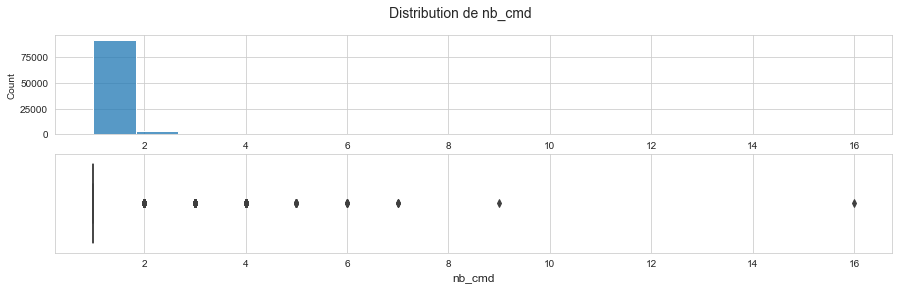

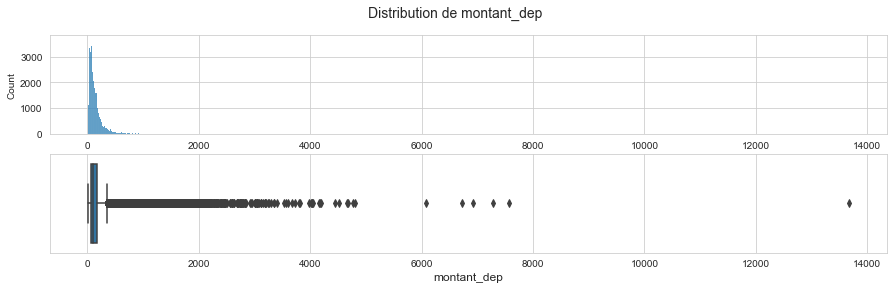

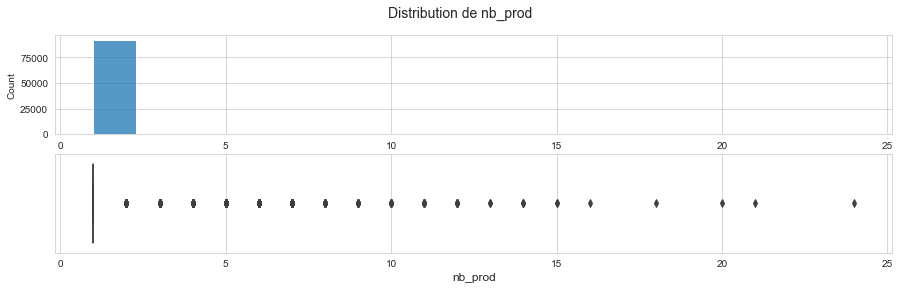

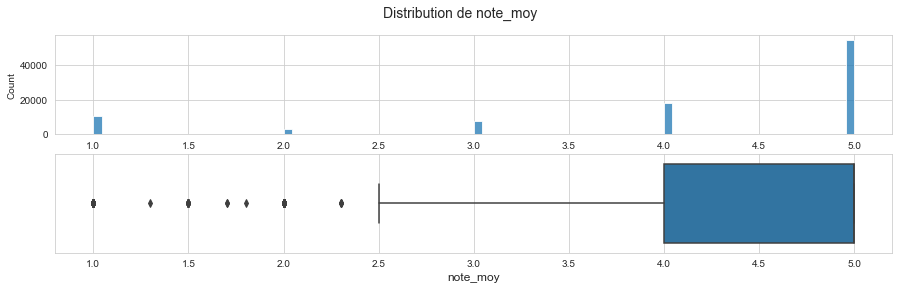

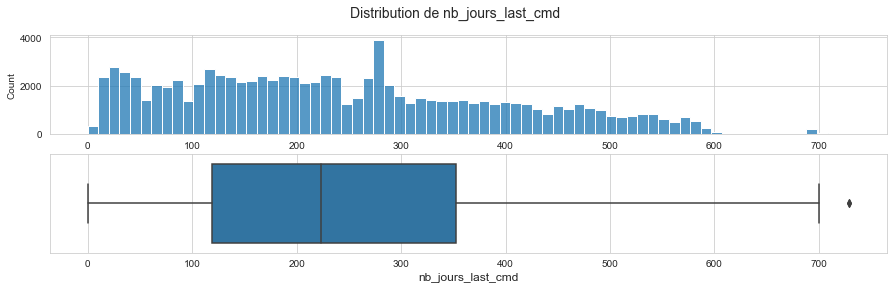

<IPython.core.display.Javascript object>

In [81]:
# Visualisation de la distribution des colonnes
for col in dfE.select_dtypes("number"):
    f, axes = plt.subplots(2, 1, figsize=(15, 4))
    plt.suptitle("Distribution de {}".format(col), size=14)
    # histogramme
    sns.histplot(x=col, data=dfE, ax=axes[0])
    # plt.xlabel(col, size=12)
    # boxplot
    sns.boxplot(x=col, data=dfE, ax=axes[1])
    plt.xlabel(col, size=12)
    plt.show()

On a "un trou" de données entre 600 et 700 jours écoulés depuis la commande la plus récente du dataset.

#### Visualisation bivariée des données

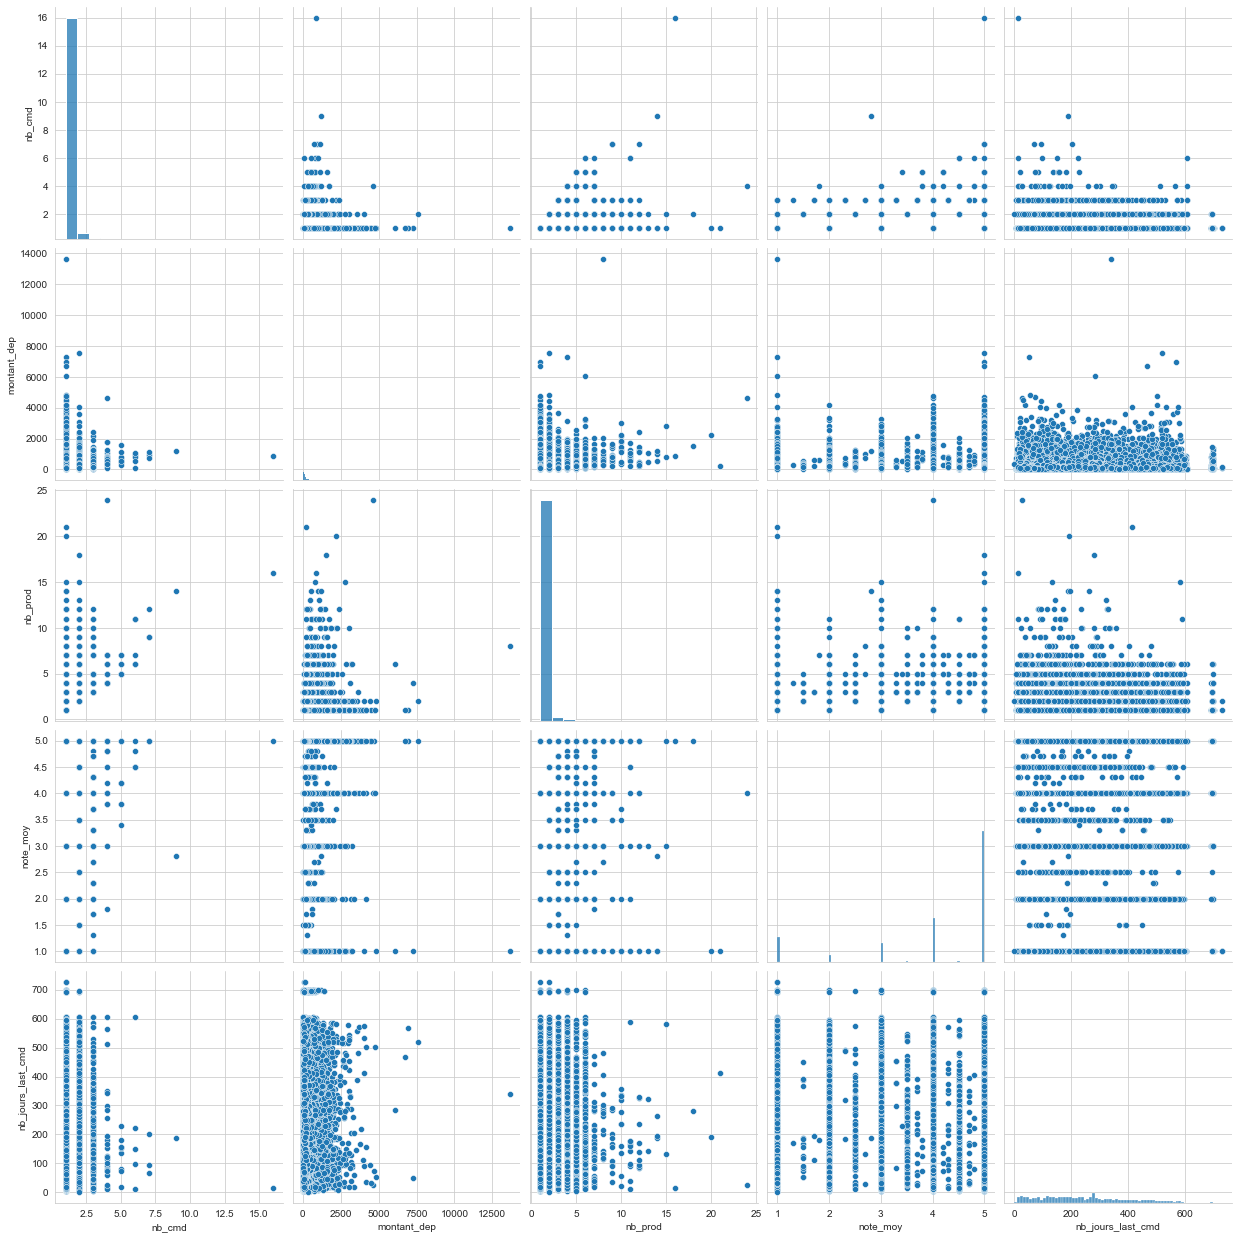

<IPython.core.display.Javascript object>

In [82]:
# Visualisation des colonnes numériques sous forme de pairplot
sns.pairplot(dfE, height=3.5)
plt.show()

A priori pas de relation linéaire entre les variables.

In [83]:
def mat_corr(df):

    """ Fonction pour tracer la matrice des corrélations entre
    les colonnes numériques d'un dataframe
        
    - Arguments :
        - df : dataframe  
    
    - Affiche :
        - 1 graphe de type heatmap indiquant pour chaque paire de
        colonnes numériques la valeurs du coefficient de corrélation
    """

    # variables dont on veut étudier les corrélations
    corr = df.select_dtypes("number").corr()

    # Génération d'un masque pour masquer le triangle supérieur et
    # n'afficher que la partie basse de la matrice
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Initialisation de la figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Générationd d'un mapping pour les couleurs
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Graphe de la matrice des corrélations (= heatmap)
    # avec le masque et affichage des valeurs de corrélation
    sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=1,
        center=0,
        square=True,
        linewidths=0.5,
        cbar=False,
        annot=True,
    )
    plt.title("Matrice des corrélations")
    plt.show()

<IPython.core.display.Javascript object>

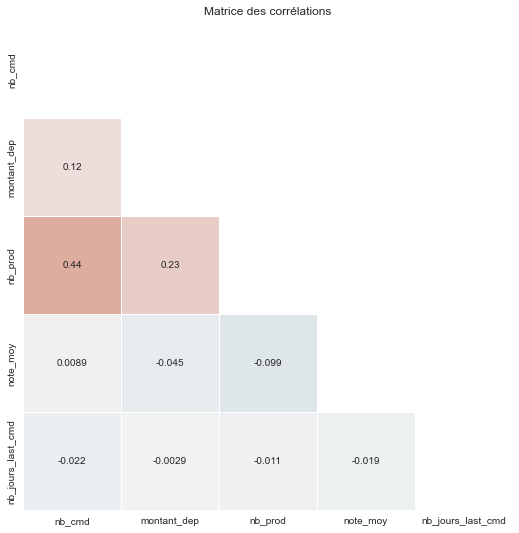

<IPython.core.display.Javascript object>

In [84]:
mat_corr(dfE)

Peu de corrélation entre les variables (tout du moins linéaire), sauf une corrélation moyenne entre le nombre de produits et le nombre de commandes.

On a très majoritairement des montants concentrés entre 0 et 500, avec des délais entre 2 commandes inférieurs à 300 jours.

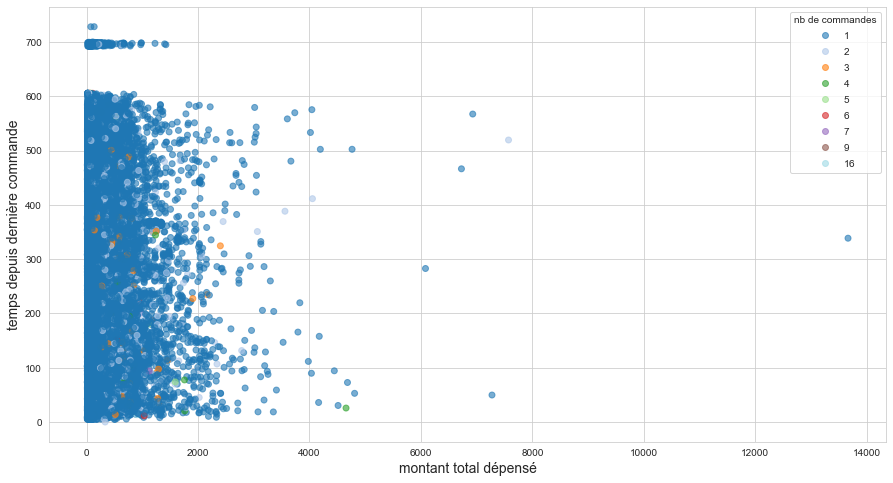

<IPython.core.display.Javascript object>

In [85]:
# Scatterplot entre le montant total dépensé
# et le temps depuis la dernière commande, selon le nombre de commandes
plt.figure(figsize=(15, 8))
g = plt.scatter(
    data=dfE,
    x="montant_dep",
    y="nb_jours_last_cmd",
    c="nb_cmd",
    alpha=0.6,
    cmap="tab20",
)
plt.xlabel("montant total dépensé", size=14)
plt.ylabel("temps depuis dernière commande", size=14)
plt.legend(*g.legend_elements(), title="nb de commandes")
plt.show()

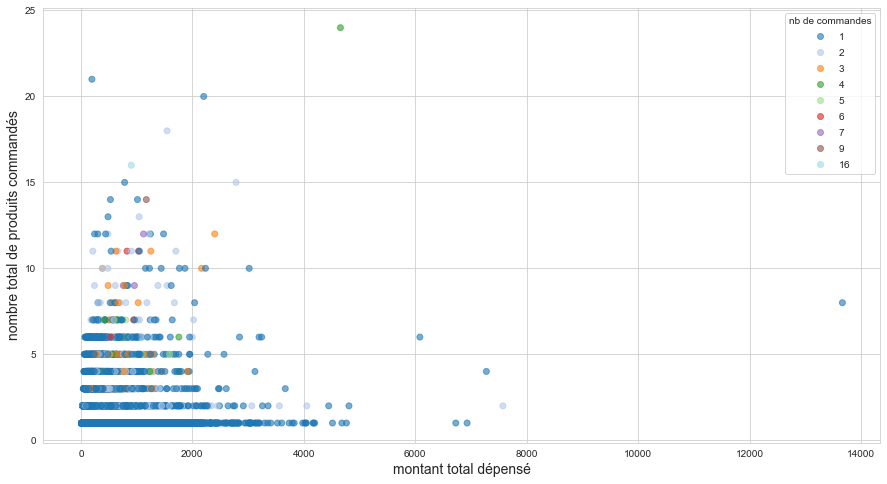

<IPython.core.display.Javascript object>

In [86]:
# Scatterplot entre le montant total dépensé
# et le nombre total de produits commandés, selon le nombre de commandes
plt.figure(figsize=(15, 8))
g = plt.scatter(
    data=dfE, x="montant_dep", y="nb_prod", c="nb_cmd", alpha=0.6, cmap="tab20"
)
plt.xlabel("montant total dépensé", size=14)
plt.ylabel("nombre total de produits commandés", size=14)
plt.legend(*g.legend_elements(), title="nb de commandes")
plt.show()

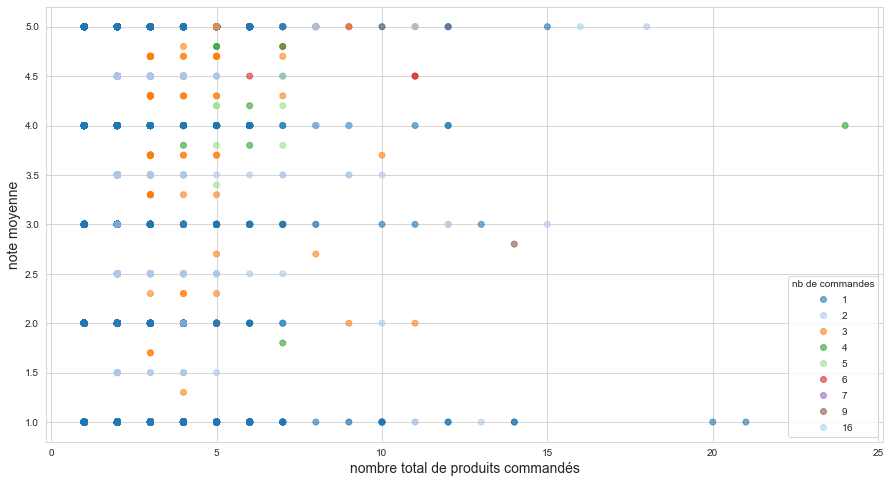

<IPython.core.display.Javascript object>

In [87]:
# Scatterplot entre le nombre total de produits commandés
# et la note moyenne, selon le nombre de commandes
plt.figure(figsize=(15, 8))
g = plt.scatter(
    data=dfE, x="nb_prod", y="note_moy", c="nb_cmd", alpha=0.6, cmap="tab20"
)
plt.xlabel("nombre total de produits commandés", size=14)
plt.ylabel("note moyenne", size=14)
plt.legend(*g.legend_elements(), title="nb de commandes")
plt.show()

Les clients ayant effectué qu'une seule commande ont des valeurs "entières" de note moyenne.

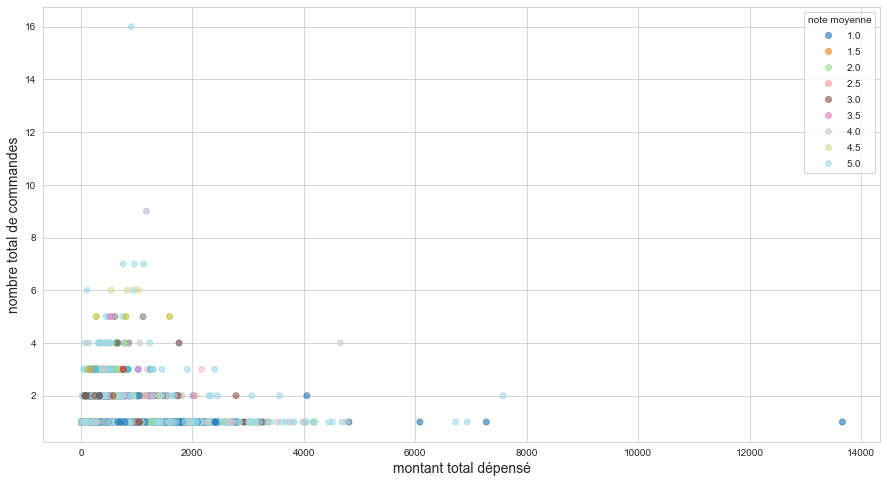

<IPython.core.display.Javascript object>

In [88]:
# Scatterplot entre le montant total dépensé
# et le nombre total de commandes, selon la note moyenne
plt.figure(figsize=(15, 8))
g = plt.scatter(
    data=dfE, x="montant_dep", y="nb_cmd", c="note_moy", alpha=0.6, cmap="tab20"
)
plt.xlabel("montant total dépensé", size=14)
plt.ylabel("nombre total de commandes", size=14)
plt.legend(*g.legend_elements(), title="note moyenne")
plt.show()

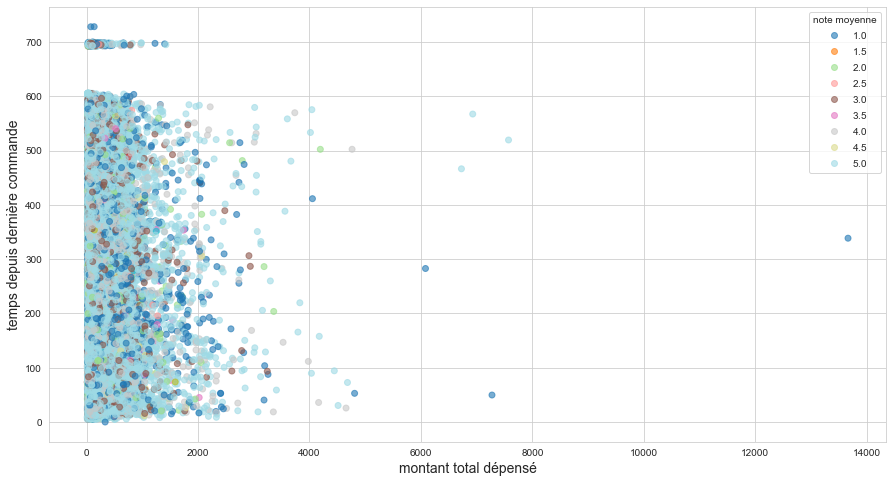

<IPython.core.display.Javascript object>

In [89]:
# Scatterplot entre le montant total dépensé
# et le temps depuis la dernière commande, selon la note
plt.figure(figsize=(15, 8))
g = plt.scatter(
    data=dfE,
    x="montant_dep",
    y="nb_jours_last_cmd",
    c="note_moy",
    alpha=0.6,
    cmap="tab20",
)
plt.xlabel("montant total dépensé", size=14)
plt.ylabel("temps depuis dernière commande", size=14)
plt.legend(*g.legend_elements(), title="note moyenne")
plt.show()

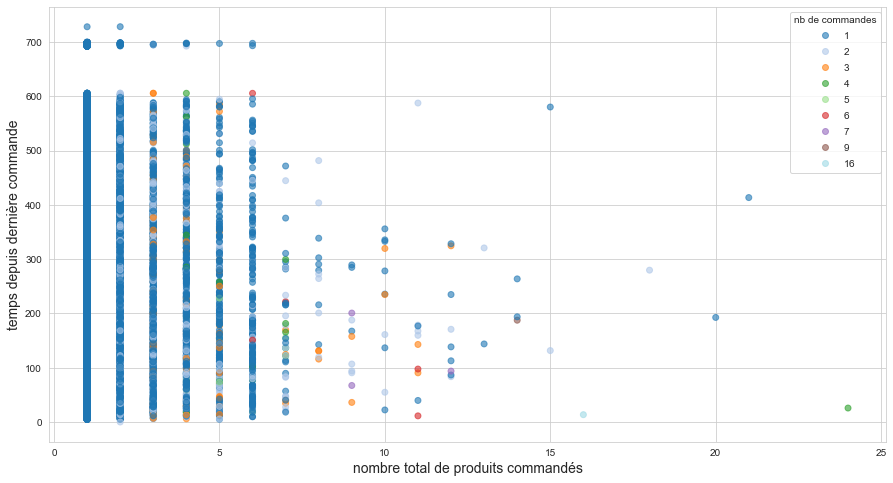

<IPython.core.display.Javascript object>

In [90]:
# Scatterplot entre le nombre total de produits commandés
# et le temps depuis la dernière commande, selon le nombre de commandes
plt.figure(figsize=(15, 8))
g = plt.scatter(
    data=dfE, x="nb_prod", y="nb_jours_last_cmd", c="nb_cmd", alpha=0.6, cmap="tab20",
)
plt.xlabel("nombre total de produits commandés", size=14)
plt.ylabel("temps depuis dernière commande", size=14)
plt.legend(*g.legend_elements(), title="nb de commandes")
plt.show()

In [91]:
%matplotlib notebook

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


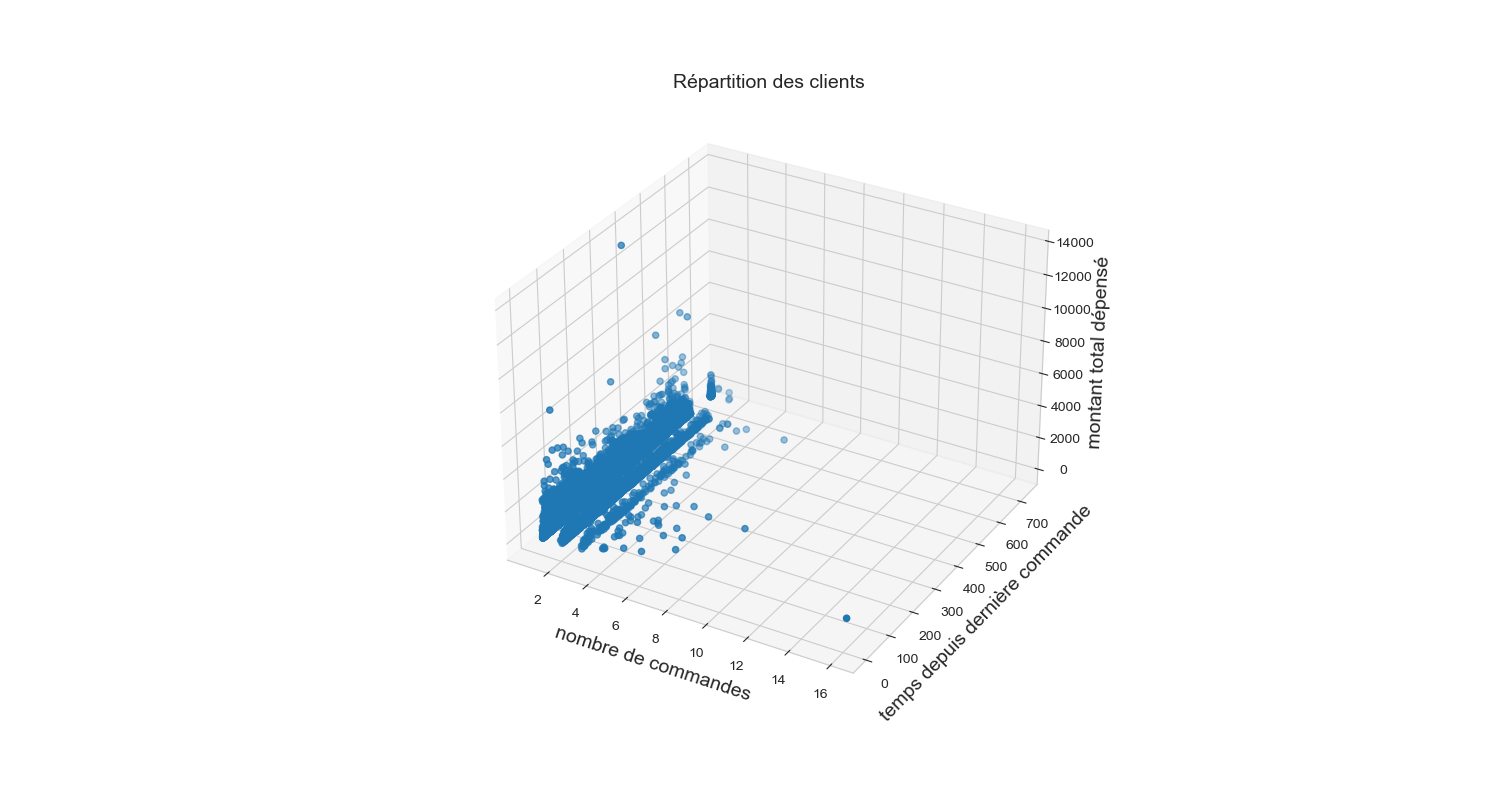

<IPython.core.display.Javascript object>

In [92]:
# Visualisation en 3D du montant total dépensé,
# du temps depuis la dernière commande et du nombre de commandes
plt.figure(figsize=(15, 8))
ax = plt.axes(projection="3d")
# Objet ax en 3D
ax.scatter(dfE["nb_cmd"], dfE["nb_jours_last_cmd"], dfE["montant_dep"])
ax.set_xlabel("nombre de commandes", size=14)
ax.set_ylabel("temps depuis dernière commande", size=14)
ax.set_zlabel("montant total dépensé", size=14)
plt.title("Répartition des clients", size=14)
plt.show()

Le nombre de commande sépare les clients.

<IPython.core.display.Javascript object>


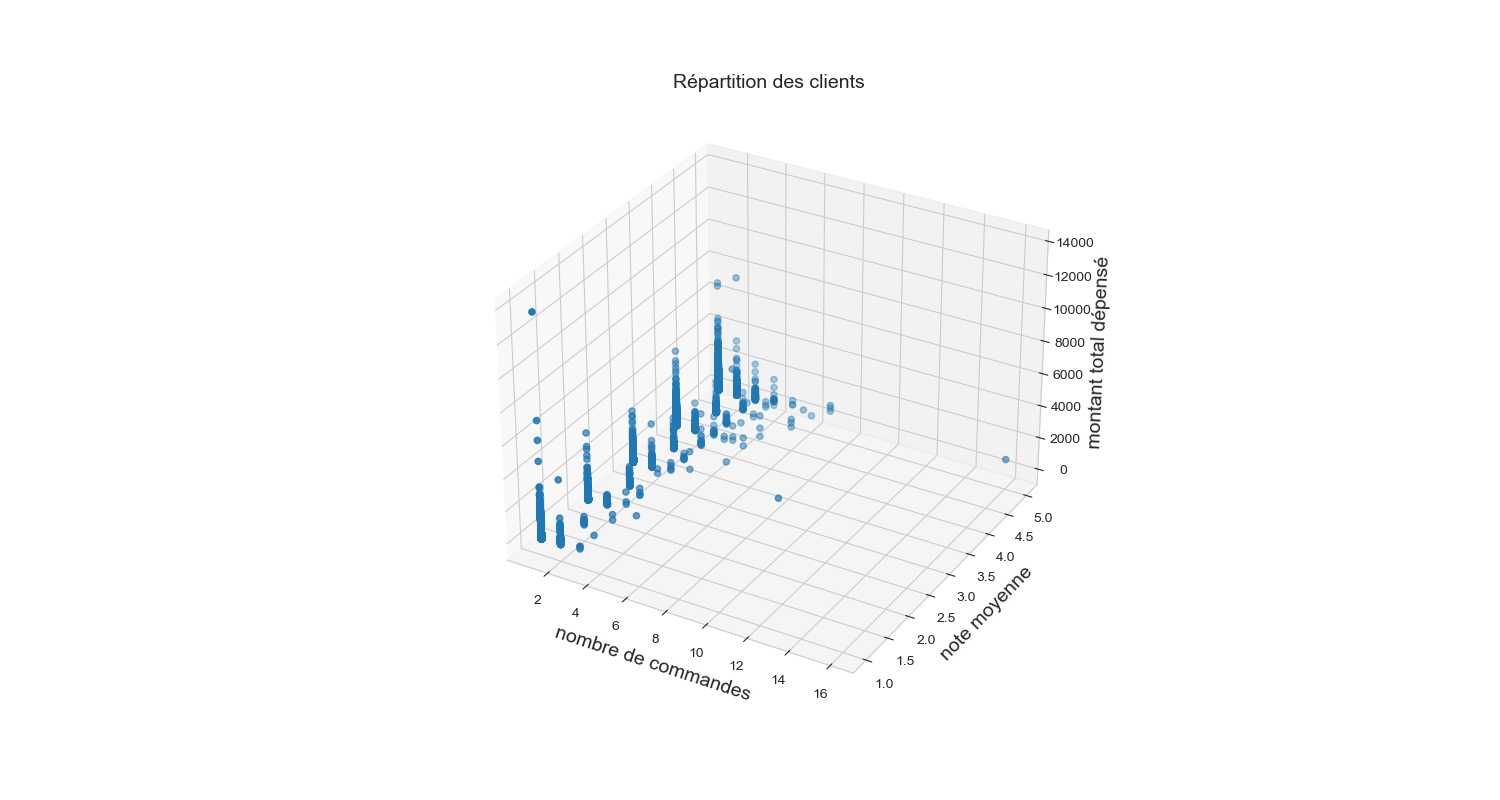

<IPython.core.display.Javascript object>

In [93]:
# Visualisation en 3D du du nombre de commandes,
# de la note moyenne et du montant total dépensé
plt.figure(figsize=(15, 8))
ax = plt.axes(projection="3d")
# Objet ax en 3D
ax.scatter(dfE["nb_cmd"], dfE["note_moy"], dfE["montant_dep"])
ax.set_xlabel("nombre de commandes", size=14)
ax.set_ylabel("note moyenne", size=14)
ax.set_zlabel("montant total dépensé", size=14)
plt.title("Répartition des clients", size=14)
plt.show()

Le nombre de commandes et la note moyenne séparent les clients.

<IPython.core.display.Javascript object>


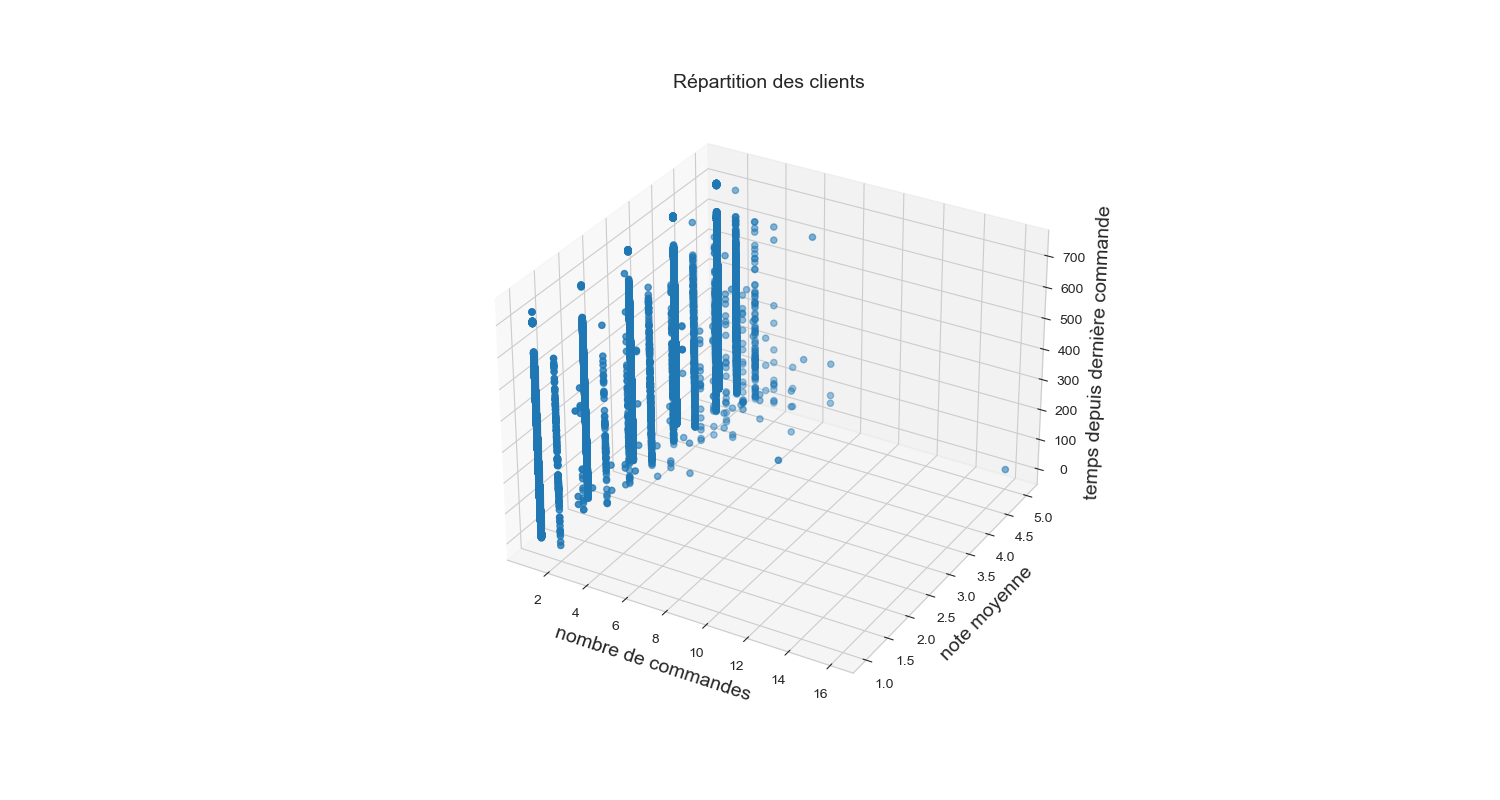

<IPython.core.display.Javascript object>

In [94]:
# Visualisation en 3D du du nombre de commandes,
# de la note moyenne et du temps depuis dernière commande
plt.figure(figsize=(15, 8))
ax = plt.axes(projection="3d")
# Objet ax en 3D
ax.scatter(dfE["nb_cmd"], dfE["note_moy"], dfE["nb_jours_last_cmd"])
ax.set_xlabel("nombre de commandes", size=14)
ax.set_ylabel("note moyenne", size=14)
ax.set_zlabel("temps depuis dernière commande", size=14)
plt.title("Répartition des clients", size=14)
plt.show()

Le temps depuis la dernière commande ne semble pas séparer les clients.

<IPython.core.display.Javascript object>


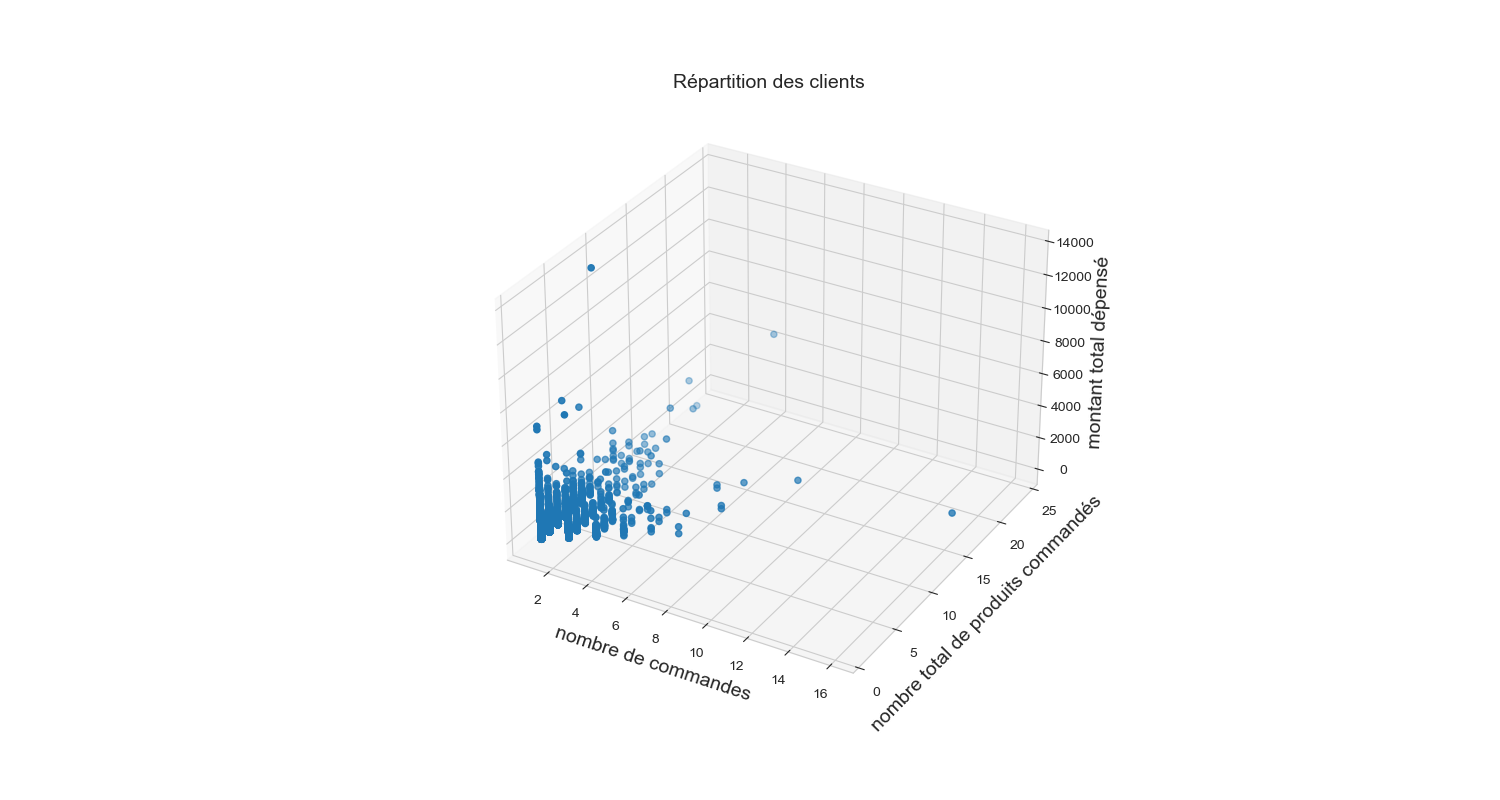

<IPython.core.display.Javascript object>

In [95]:
# Visualisation en 3D du montant total dépensé,
# du nombre de produits commandés et du nombre de commandes
plt.figure(figsize=(15, 8))
ax = plt.axes(projection="3d")
# Objet ax en 3D
ax.scatter(dfE["nb_cmd"], dfE["nb_prod"], dfE["montant_dep"])
ax.set_xlabel("nombre de commandes", size=14)
ax.set_ylabel("nombre total de produits commandés", size=14)
ax.set_zlabel("montant total dépensé", size=14)
plt.title("Répartition des clients", size=14)
plt.show()

<IPython.core.display.Javascript object>


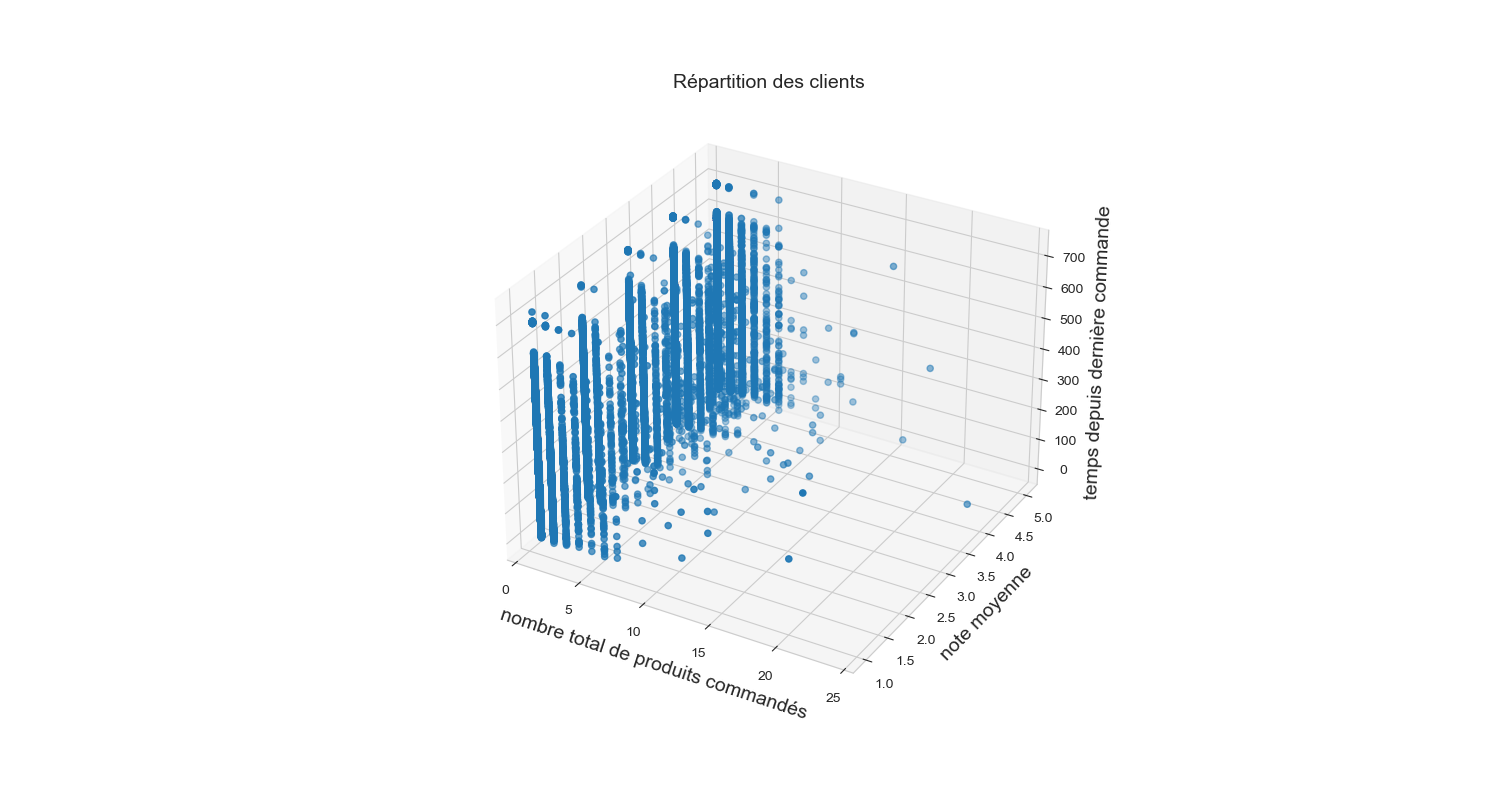

<IPython.core.display.Javascript object>

In [96]:
# Visualisation en 3D du nombre de produits commandés,
# de la note moyenne et du temps depuis dernière commande
plt.figure(figsize=(15, 8))
ax = plt.axes(projection="3d")
# Objet ax en 3D
ax.scatter(dfE["nb_prod"], dfE["note_moy"], dfE["nb_jours_last_cmd"])
ax.set_xlabel("nombre total de produits commandés", size=14)
ax.set_ylabel("note moyenne", size=14)
ax.set_zlabel("temps depuis dernière commande", size=14)
plt.title("Répartition des clients", size=14)
plt.show()

<IPython.core.display.Javascript object>


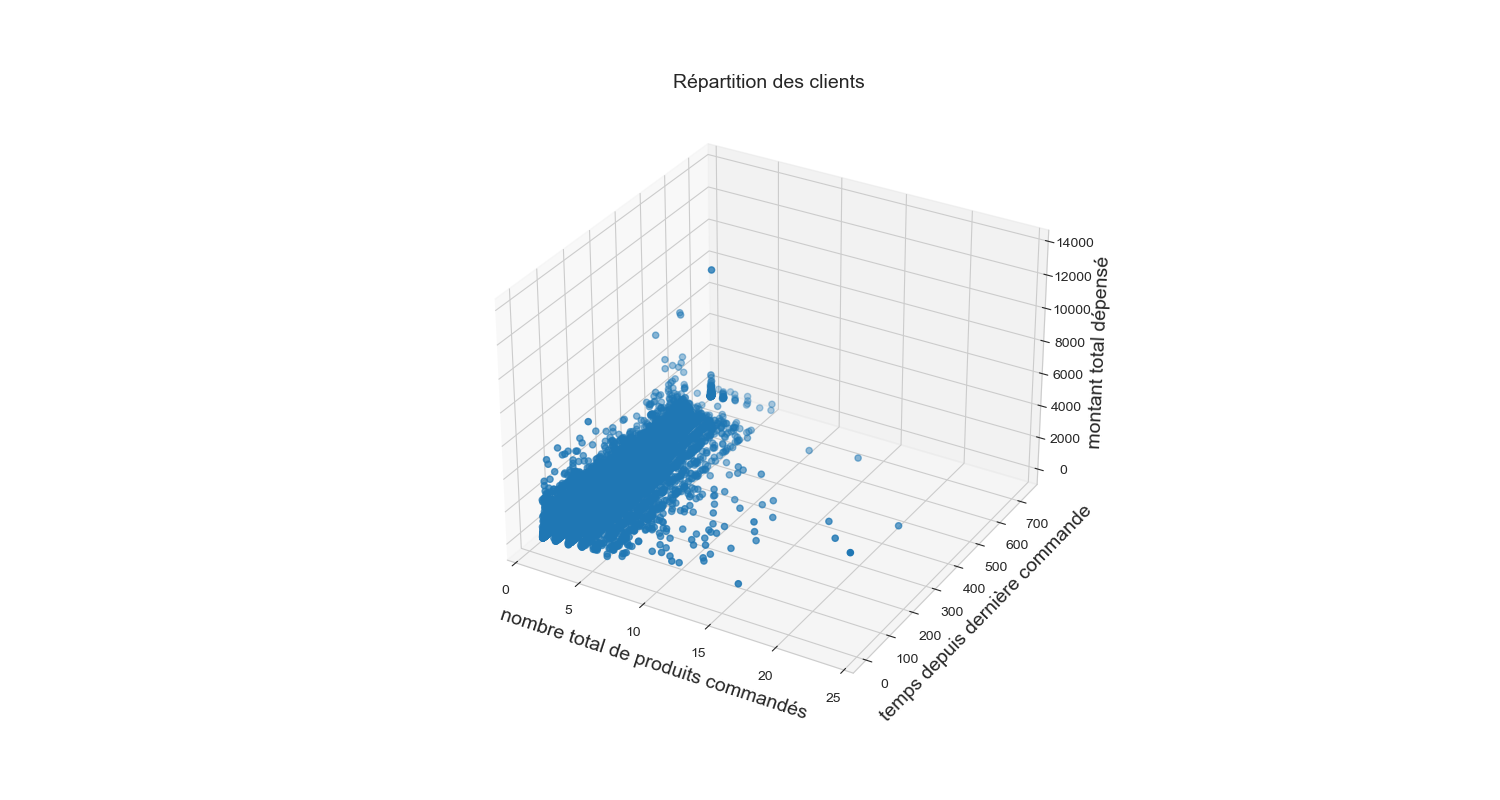

<IPython.core.display.Javascript object>

In [97]:
# Visualisation en 3D du nombre de produits commandés,
# du temps depuis la dernière commande et du montant total dépensé
plt.figure(figsize=(15, 8))
ax = plt.axes(projection="3d")
# Objet ax en 3D
ax.scatter(dfE["nb_prod"], dfE["nb_jours_last_cmd"], dfE["montant_dep"])
ax.set_xlabel("nombre total de produits commandés", size=14)
ax.set_ylabel("temps depuis dernière commande", size=14)
ax.set_zlabel("montant total dépensé", size=14)
plt.title("Répartition des clients", size=14)
plt.show()

<IPython.core.display.Javascript object>


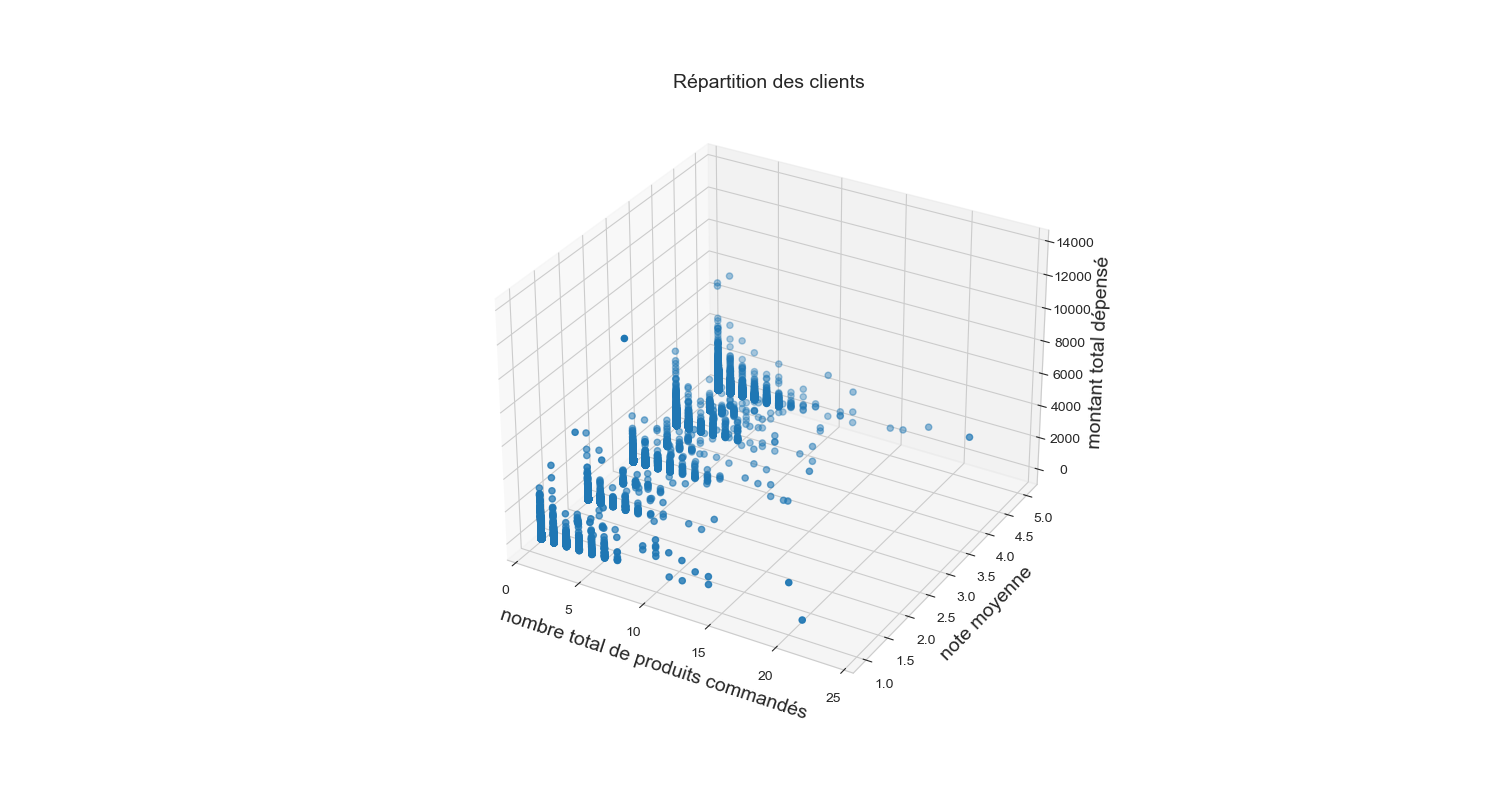

<IPython.core.display.Javascript object>

In [98]:
# Visualisation en 3D du nombre de produits commandés,
# de la note moyenne et du montant total dépensé
plt.figure(figsize=(15, 8))
ax = plt.axes(projection="3d")
# Objet ax en 3D
ax.scatter(dfE["nb_prod"], dfE["note_moy"], dfE["montant_dep"])
ax.set_xlabel("nombre total de produits commandés", size=14)
ax.set_ylabel("note moyenne", size=14)
ax.set_zlabel("montant total dépensé", size=14)
plt.title("Répartition des clients", size=14)
plt.show()

Pas sûr que le nombre de produits ait une influence.